In [1]:
! pip install pandasql

In [ ]:
#Github URL: https://github.com/XHGJ4/DMHR

In [2]:
import pandas as pd
import numpy as np
from pandasql import PandaSQL

%matplotlib inline
import random
import matplotlib.pyplot as plt

In [3]:
#QUESTION A
#1  Identify all GP practices and produce a table with the total number of prescriptions 
#   and their total actual cost (using the ACT COST column).

url_prac_dt = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/practices_Dec2015.csv'
url_pres_dt = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/prescribing_Dec2015.csv'

In [4]:
chunksize = 10 ** 6

In [5]:
prac_dt = pd.read_csv(url_prac_dt, header=None)

tp = pd.read_csv(url_pres_dt,low_memory=False, chunksize=chunksize, iterator=True)
pres_dt = pd.concat(tp, ignore_index=True)

In [6]:
#There are some white space in the column names, we need to get rid of them

list(pres_dt)

[' SHA',
 'PCT',
 'PRACTICE',
 'BNF CODE',
 'BNF NAME                                    ',
 'ITEMS  ',
 'NIC        ',
 'ACT COST   ',
 'QUANTITY',
 'PERIOD',
 '                 ']

In [7]:
pres_dt.columns = [x.strip() for x in pres_dt.columns]

In [8]:
list(pres_dt)

['SHA',
 'PCT',
 'PRACTICE',
 'BNF CODE',
 'BNF NAME',
 'ITEMS',
 'NIC',
 'ACT COST',
 'QUANTITY',
 'PERIOD',
 '']

In [9]:
pres_dt.head(5)


,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,
0,Q44,RJN,Y05218,0501013K0AAAJAJ,Co-Amoxiclav_Tab 500mg/125mg,1,3.59,3.33,21,201512,
1,Q44,RJN,Y05218,0501130R0AAAAAA,Nitrofurantoin_Cap 50mg,1,14.39,13.42,28,201512,
2,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,1,0.51,0.58,14,201512,
3,Q44,RTV,Y04937,0401020P0AAABAB,Lorazepam_Tab 1mg,1,2.65,2.46,28,201512,
4,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,2,2.01,2.08,84,201512,


In [10]:
#Give the practice table column names in order to select the columns more easily, and drop the last column, 
#which did not give any information

prac_dt.columns = ['period','practice','clinic_name','address','road','city','county','postcode','dontknow']
prac_dt.drop('dontknow', axis=1, inplace=True)
prac_dt.head(5)

,period,practice,clinic_name,address,road,city,county,postcode
0,201512,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU
1,201512,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,201512,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB
3,201512,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,,MIDDLESBROUGH,CLEVELAND,TS1 3BE
4,201512,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ


In [11]:
#There are some white space in the column values, we need to get rid of them

prac_dt['postcode'] = prac_dt['postcode'].map(lambda x: x.strip())
prac_dt['city'] = prac_dt['city'].map(lambda x: x.strip())
prac_dt['county'] = prac_dt['county'].map(lambda x: x.strip())

In [12]:
#remember to check the missing value

#There is a mis-placement problem in the dataset, e.g. some city names have been put into the county column. 
#Thus I choose both city name and county name columns to match the name 'Bournemouth'
#Also, I assume that there is no spelling mistakes of the word 'Bournemouth' in the dataset
#I searched online, and I find that SOUTHBOURNE BOURNEMOUTH is also a part of Bournemouth, thus I count this city as Bournemouth

prac_BM_dt = prac_dt.loc[prac_dt['city'].str.contains('BOURNEMOUTH')|prac_dt['county'].str.contains('BOURNEMOUTH')]
prac_BM_dt
#The following table is all practices in the Bournemouth city


,period,practice,clinic_name,address,road,city,county,postcode
3841,201512,J81003,ALMA PARTNERSHIP,ALMA MEDICAL CENTRE,31 ALMA ROAD WINTON,BOURNEMOUTH,DORSET,BH9 1BP
3842,201512,J81004,POOLE ROAD MEDICAL CENTRE,POOLE ROAD MEDICAL CENTRE,7 POOLE ROAD WESTBOURNE,BOURNEMOUTH,DORSET,BH2 5QR
3850,201512,J81014,WESTBOURNE MEDICAL CENTRE,WESTBOURNE MEDICAL CENTRE,MILBURN ROAD WESTBOURNE,BOURNEMOUTH,DORSET,BH4 9HJ
3853,201512,J81018,BEAUFORT ROAD SURGERY,BEAUFORT ROAD SURGERY,21 BEAUFORT ROAD,SOUTHBOURNE BOURNEMOUTH,DORSET,BH6 5AJ
3856,201512,J81021,SHELLEY MANOR MEDICAL CENTRE,SHELLEY MANOR MED CTR,BEECHWOOD AVENUE,BOURNEMOUTH,DORSET,BH5 1LX
3858,201512,J81024,HOLDENHURST ROAD SURGERY,HOLDENHURST ROAD SURGERY,199 HOLDENHURST ROAD,BOURNEMOUTH,DORSET,BH8 8DE
3867,201512,J81033,TALBOT MEDICAL CENTRE,TALBOT MEDICAL CENTRE,63 KINSON RD WALLISDOWN,BOURNEMOUTH,DORSET,BH10 4BX
3871,201512,J81038,NORTHBOURNE SURGERY,NORTHBOURNE SURGERY,1368 WIMBORNE ROAD,NORTHBOURNE,BOURNEMOUTH,BH10 7AR
3872,201512,J81039,MOORDOWN MEDICAL CENTRE,MOORDOWN MEDICAL CENTRE,2A REDHILL CRES MOORDOWN,BOURNEMOUTH,DORSET,BH9 2XF
3878,201512,J81045,KINSON ROAD MEDICAL CENTRE,KINSON ROAD MEDICAL CTR,440 KINSON RD KINSON,BOURNEMOUTH,DORSET,BH10 5EY


In [13]:
#I do not need all practices' addresses to repeat so many times, 
#thus I pick the list of practice code in Bournemouth, and use the code list to select all prescribing data in Bournemouth

pres_BM_dt = pres_dt[pres_dt['PRACTICE'].isin(prac_BM_dt['practice'])]
pres_BM_dt.head(5)

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,
10097397,Q70,11J,J81003,0101021B0AAAHAH,Alginate_Raft-Forming Oral Susp S/F,1,5.16,4.78,300,201512,
10097398,Q70,11J,J81003,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,3,11.78,11.03,1150,201512,
10097399,Q70,11J,J81003,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,1,8.78,8.13,30,201512,
10097400,Q70,11J,J81003,0101021B0BEAIAL,Gaviscon Advance_Liq (Aniseed) (Reckitt),16,97.52,90.37,8450,201512,
10097401,Q70,11J,J81003,0101021B0BEAQAP,Gaviscon Advance_Tab Chble Mint(Reckitt),3,12.28,11.39,240,201512,


In [14]:
#After I check the unique value in the BNF CODE column and the BNF NAME column, I find that
#there are more unique values in the BNF CODE column than the BNF NAME column. However the number of BNF CODE should 
#be same as BNF NAME. Thus, there are some wrong value in these two columns. Since the number of unique values of BNF NAME
#is smaller than the number of unique values of BNF CODE, there are some BNF NAMEs have serval BNF CODE.
#I believe the BNF CODE column involved more incorrect data, and
#I pick the BNF NAME as the main value to identify different prescriptions.

In [15]:
len(pd.unique(pres_BM_dt['BNF NAME']))

5430

In [16]:
len(pd.unique(pres_BM_dt['BNF CODE']))

5533

In [17]:
len(pd.unique(pres_dt['BNF CODE']))

21873

In [18]:
len(pd.unique(pres_dt['BNF NAME']))

19088

In [19]:
#total number of prescriptions, since the problem did not define 
#the total number of prescriptions in item level or quantity leve, 
#I choose to use item level as the total number of total number of prescriptions.
#I sum up all items for each prescription

pres_BM_temp1 = pres_BM_dt.groupby(['BNF NAME'],as_index=False)['ITEMS'].sum()
pres_BM_temp1.head(5)

,BNF NAME,ITEMS
0,3m Health Care_Cavilon Durable Barrier C,93
1,3m Health Care_Cavilon No Sting 1ml Barr,6
2,3m Health Care_Cavilon No Sting 3ml Barr,4
3,3m Health Care_Cavilon No Sting Barrier,21
4,A.S Saliva Orthana Spy 50ml (App),11


In [21]:
#Sum up actual cost for each prescription
pres_BM_temp2 = pres_BM_dt.groupby(['BNF NAME'],as_index=False)['ACT COST'].sum()
pres_BM_temp2.head(5)

,BNF NAME,ACT COST
0,3m Health Care_Cavilon Durable Barrier C,849.00
1,3m Health Care_Cavilon No Sting 1ml Barr,97.13
2,3m Health Care_Cavilon No Sting 3ml Barr,118.82
3,3m Health Care_Cavilon No Sting Barrier,235.81
4,A.S Saliva Orthana Spy 50ml (App),72.91


In [22]:
#The table with the total number of prescriptions and their total actual cost

pres_BM_TABLE = pd.merge(pres_BM_temp1,pres_BM_temp2,on='BNF NAME')

#Change the columns' name for the table
pres_BM_TABLE.columns = ['BNF NAME', 'total number of prescriptions', 'total actual cost']
pres_BM_TABLE

,BNF NAME,total number of prescriptions,total actual cost
0,3m Health Care_Cavilon Durable Barrier C,93,849.00
1,3m Health Care_Cavilon No Sting 1ml Barr,6,97.13
2,3m Health Care_Cavilon No Sting 3ml Barr,4,118.82
3,3m Health Care_Cavilon No Sting Barrier,21,235.81
4,A.S Saliva Orthana Spy 50ml (App),11,72.91
5,A2A Spacer + Sml/Med Mask,1,6.19
6,AMI_Suportx Ostomy & A/Support Ladies Br,2,27.33
7,Abidec_Dps,23,77.23
8,Abilify_Tab 5mg,1,88.82
9,Able Spacer,7,32.55


In [23]:
#QUESTION A
#2  Find the top ten most/least frequently prescribed medications across all practices. 
#   What is their total actual cost and how does that compare to 
#   the overall actual costs of each practice and of the entire city?

In [24]:
#Since the problem did not define frequently prescribed medications in the item level or in the quantity level.
#I choose to use item level as the standard to define frequently prescribed medications.
#TOP 10 most frequently prescribed medications.

pres_most_freq_each_total_cost = pres_BM_TABLE.sort_values('total number of prescriptions', ascending=False).head(10)
pres_most_freq_each_total_cost


,BNF NAME,total number of prescriptions,total actual cost
3795,Omeprazole_Cap E/C 20mg,10595,18393.26
323,Aspirin Disper_Tab 75mg,5575,6229.53
3972,Paracet_Tab 500mg,4768,17494.42
220,Amlodipine_Tab 5mg,3632,4818.67
4647,Simvastatin_Tab 40mg,3618,5543.85
467,Bendroflumethiazide_Tab 2.5mg,3441,4551.01
213,Amitriptyline HCl_Tab 10mg,3365,6245.44
4482,Salbutamol_Inha 100mcg (200 D) CFF,3309,6894.08
4331,Ramipril_Cap 10mg,3089,6154.20
5217,Ventolin_Evohaler 100mcg (200 D),3006,7256.52


In [25]:
#Top 10 least frequently prescribed medications
#All least ten frequently prescribed medications' ITEM numbers are all equal to 1, 
#it is possible some prescribed medications also have ITEM numbers equal to 1, but since the 
#order to top ten least frequently prescribed medications arranged in alphabetical order, 
#their name did not show on the list.

pres_least_freq_each_total_cost = pres_BM_TABLE.sort_values('total number of prescriptions', ascending=True).head(10)
pres_least_freq_each_total_cost

,BNF NAME,total number of prescriptions,total actual cost
5429,keragelT Keratin Dress 5g Tube,1,36.62
4633,Similac High Energy_Liq,1,98.49
2052,Fluphenazine Decan_Inj 25mg/ml 1ml Amp,1,4.28
2048,Fluoxetine HCl_Tab Disper 20mg S/F,1,3.19
2042,Fluorouracil/Salic Acid_Cutaneous Soln,1,35.43
4649,Sinemet CR_Tab 250mg,1,5.11
2039,Fluorigard Daily_Dental Rinse 0.05%,1,2.78
2034,Fluocinolone Aceton_Crm 0.0025%,1,4.25
4651,Sinemet_Tab 10mg/100mg,1,7.68
2028,Fluconazole_Oral Susp 200mg/5ml,1,61.43


In [26]:
#overall actual costs of each practice in Bournemouth
prac_pres_BM_TABLE = pres_BM_dt.groupby(['PRACTICE'],as_index=False)['ACT COST'].sum()
prac_pres_BM_TABLE 


,PRACTICE,ACT COST
0,J81003,85254.50
1,J81004,112164.93
2,J81014,196970.73
3,J81018,150752.71
4,J81021,135113.16
5,J81024,98899.21
6,J81033,149390.24
7,J81038,86489.54
8,J81039,79655.98
9,J81045,138847.04


In [27]:
#overall actual costs of the entire city
entire_city_cost = prac_pres_BM_TABLE['ACT COST'].sum()
entire_city_cost

2604681.2799999993

In [28]:
#Top 10 most frequently prescribed medications total actual cost
pres_most_freq_each_total_cost['total actual cost'].sum()

83580.97999999998

In [29]:
#Percentage of the actual cost of top ten most frequently prescribed medications across all practices in the Bournemouth
#in the acutal cost of entire city is 3.2%
top_ten_freq_perc_BM = pres_most_freq_each_total_cost['total actual cost'].sum()/entire_city_cost
top_ten_freq_perc_BM

0.03208875521230759

In [30]:
#Percentage of the actual cost of least ten frequently prescribed medications across all practices in the Bournemouth
#in the acutal cost of entire city is 0.0099%
least_ten_freq_perc_BM = pres_least_freq_each_total_cost['total actual cost'].sum()/entire_city_cost
least_ten_freq_perc_BM

9.953617050605134e-05

In [31]:
#The total actual cost of top ten most frequently prescribed medications compare to 
#the overall actual costs of each practice in the Bournemouth

#Although the percentage of the actual cost of top ten most frequently prescribed medications across all practices in the Bournemouth
#in the acutal cost of entire city is only 3.2%, there are 10 practices' actual cost is 
#less than the total actual cost of top ten most frequently prescribed medications

len(prac_pres_BM_TABLE[prac_pres_BM_TABLE['ACT COST'] <= pres_most_freq_each_total_cost['total actual cost'].sum()])

10

In [32]:
#The total actual cost of top ten least frequently prescribed medications compare to 
#the overall actual costs of each practice in the Bournemouth

#There are only 2 practices' actual cost is less than the total actual cost of top ten least frequently prescribed medications

len(prac_pres_BM_TABLE[prac_pres_BM_TABLE['ACT COST'] <= pres_least_freq_each_total_cost['total actual cost'].sum()])

2

In [33]:
#The average actual cost for each practice is 93024.33, which is more than the total actual cost of 
#top ten most frequently prescribed medications across all practices in the Bournemouth, 
#since the total actual cost of top ten most frequently prescribed medications is 83580.98

#In addition, the median value of actual cost for each practice is 104225.69 which is also higher than the 
#total actual cost of the top ten most frequently prescribed medications and 
#the top ten least frequently prescribed medications


prac_pres_BM_TABLE['ACT COST'].mean()

93024.33142857142

In [34]:
prac_pres_BM_TABLE['ACT COST'].median()

104225.69499999992

In [35]:
#The standard deviation of top 10 most frequently prescribed medications actual cost is 5124.3, and for 
#top 10 least frequently prescribed medications actual cost is 32.47
#Both values are much lower than the standard deviation of the total actual cost of all practices in the Bournemouth.

pres_most_freq_each_total_cost['total actual cost'].std()

5124.304095959002

In [36]:
pres_least_freq_each_total_cost['total actual cost'].std()

32.46885591523736

In [37]:
prac_pres_BM_TABLE['ACT COST'].std()

54075.35851956098

In [38]:
#QUESTION A
#3  Find the top ten most expencive medications and calculate their total actual cost.


#Since the problem did not define the word 'expensive' in item level or in quantity level, in this question
#I choose to use quantity level expensive (total cost/quantity) as the standard to compare each medication.


pres_each_quantity_sum = pres_BM_dt.groupby(['BNF NAME'],as_index=False)['QUANTITY'].sum()
pres_quantity_cost_table = pd.merge(pres_each_quantity_sum, pres_BM_temp2, 
                                           on='BNF NAME', how='inner')
pres_quantity_cost_table


,BNF NAME,QUANTITY,ACT COST
0,3m Health Care_Cavilon Durable Barrier C,142,849.00
1,3m Health Care_Cavilon No Sting 1ml Barr,21,97.13
2,3m Health Care_Cavilon No Sting 3ml Barr,16,118.82
3,3m Health Care_Cavilon No Sting Barrier,144,235.81
4,A.S Saliva Orthana Spy 50ml (App),16,72.91
5,A2A Spacer + Sml/Med Mask,1,6.19
6,AMI_Suportx Ostomy & A/Support Ladies Br,3,27.33
7,Abidec_Dps,625,77.23
8,Abilify_Tab 5mg,28,88.82
9,Able Spacer,8,32.55


In [39]:
#Define expensive means comparing the cost per drug, rather than item
#top ten most expencive medications and their total actual cost
pres_quantity_cost_table['cost_per_drug'] = pres_quantity_cost_table['ACT COST']/pres_quantity_cost_table['QUANTITY']
pres_expensive_sort = pres_quantity_cost_table.sort_values('cost_per_drug', ascending=False)
pres_expensive_sort.head(10)

,BNF NAME,QUANTITY,ACT COST,cost_per_drug
1456,Decapeptyl SR_Inj 22.5mg Vl + Dil,1,382.83,382.830000
1461,Denosumab_Inj 70mg/ml 1.7ml Vl,2,573.04,286.520000
2320,Goserelin Acet_Implant 10.8mg Pfs,7,1521.09,217.298571
5390,Zoladex LA_Implant 10.8mg SafeSystem Pfs,13,2824.80,217.292308
2942,Leuprorelin Acet_Inj 11.25mg Dil + Pfs,30,6261.43,208.714333
4260,Prostap 3_DCS Inj 11.25mg Dil + Pfs,81,16905.69,208.712222
5054,Triptorelin Acet_Inj 11.25mg Vl + Dil,1,191.43,191.430000
1455,Decapeptyl SR_Inj 11.25mg Vl + Dil,16,3062.69,191.418125
1460,Denosumab_Inj 60mg/1ml Pfs,4,696.89,174.222500
2809,Juxta-Fit Essentials Upper Leg + Knee Pi,1,130.76,130.760000


In [40]:
#bar chart of top 10 expensive med here

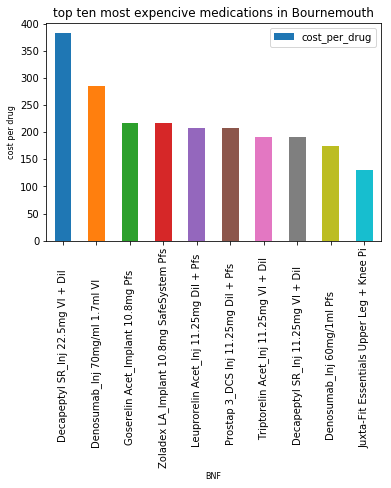

In [41]:
pres_tp10_expensive = pres_expensive_sort.head(10)
ax=pres_tp10_expensive[['BNF NAME','cost_per_drug']].plot(kind='bar', x='BNF NAME', y='cost_per_drug', title='top ten most expencive medications in Bournemouth', figsize=(6,4),legend=True, fontsize=10)

ax.set_xlabel("BNF",fontsize=8)

ax.set_ylabel("cost per drug",fontsize=8)

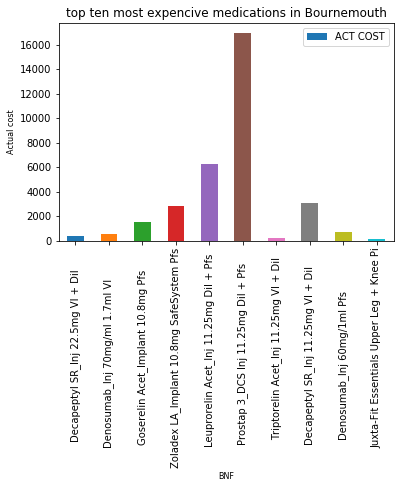

In [42]:
ax=pres_tp10_expensive[['BNF NAME','ACT COST']].plot(kind='bar', x='BNF NAME', y='ACT COST', title='top ten most expencive medications in Bournemouth', figsize=(6,4),legend=True, fontsize=10)

ax.set_xlabel("BNF",fontsize=8)

ax.set_ylabel("Actual cost",fontsize=8)

In [44]:
#QUESTION A
#4  How does prescribing (frequency and costs) in your city 
#   compare when using prescribing data from Cambridge as a reference?

#prescribing (frequency and costs) in Bournemouth is the following table
pres_BM_TABLE




,BNF NAME,total number of prescriptions,total actual cost
0,3m Health Care_Cavilon Durable Barrier C,93,849.00
1,3m Health Care_Cavilon No Sting 1ml Barr,6,97.13
2,3m Health Care_Cavilon No Sting 3ml Barr,4,118.82
3,3m Health Care_Cavilon No Sting Barrier,21,235.81
4,A.S Saliva Orthana Spy 50ml (App),11,72.91
5,A2A Spacer + Sml/Med Mask,1,6.19
6,AMI_Suportx Ostomy & A/Support Ladies Br,2,27.33
7,Abidec_Dps,23,77.23
8,Abilify_Tab 5mg,1,88.82
9,Able Spacer,7,32.55


In [45]:
#Since there are other cities' names contain the name of 'CAMBRIDGE', thus I use exact match method to find out all practices
#in the CAMBRIDGE
prac_CB_dt = prac_dt.loc[(prac_dt['city'] == 'CAMBRIDGE') | (prac_dt['county'] == 'CAMBRIDGE')]
prac_CB_dt.head(5)

,period,practice,clinic_name,address,road,city,county,postcode
1535,201512,D81001,LENSFIELD MEDICAL PRACTICE,LENSFIELD MEDICAL PRAC.,48 LENSFIELD ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB2 1EH
1536,201512,D81002,HUNTINGDON ROAD SURGERY,HUNTINGDON ROAD SURGERY,1 HUNTINGDON ROAD,CAMBRIDGE,,CB3 0DB
1537,201512,D81003,YORK STREET MEDICAL PRACTICE,YORK STREET MED PRACT.,146-148 YORK STREET,CAMBRIDGE,CAMRIDGESHIRE,CB1 2PY
1539,201512,D81005,NEWNHAM WALK SURGERY,NEWNHAM WALK SURGERY,WORDSWORTH GROVE,CAMBRIDGE,CAMBRIDGESHIRE,CB3 9HS
1542,201512,D81009,SHELFORD MEDICAL PRACTICE,SHELFORD MEDICAL PRACTICE,ASHEN GREEN GRT SHELFORD,CAMBRIDGE,,CB22 5FY


In [46]:
pres_CB_dt = pres_dt[pres_dt['PRACTICE'].isin(prac_CB_dt['practice'])]
pres_CB_dt.head()


,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,
4409646,Q56,06H,D81001,0101021B0AAAHAH,Alginate_Raft-Forming Oral Susp S/F,5,9.99,9.31,2050,201512,
4409647,Q56,06H,D81001,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,5,35.23,33.05,3440,201512,
4409648,Q56,06H,D81001,0101021B0BEACAH,Gaviscon_Liq Orig Aniseed Relief,2,14.43,13.47,1150,201512,
4409649,Q56,06H,D81001,0101021B0BEAFAH,Gaviscon_Liq Relief Peppermint,1,7.11,6.59,600,201512,
4409650,Q56,06H,D81001,0101021B0BEAIAL,Gaviscon Advance_Liq (Aniseed) (Reckitt),2,10.24,9.50,1000,201512,


In [47]:
#as I mentioned above, I choose to use BNF NAME and ITEM columns.


In [48]:
pres_CB_total_med_freq_sum = pres_CB_dt.groupby(['BNF NAME'],as_index=False)['ITEMS'].sum()

pres_CB_total_med_freq_sum.head(5)

,BNF NAME,ITEMS
0,3m Health Care_Cavilon Durable Barrier C,479
1,3m Health Care_Cavilon No Sting 1ml Barr,27
2,3m Health Care_Cavilon No Sting 3ml Barr,3
3,3m Health Care_Cavilon No Sting Barrier,55
4,4Head_Top Headache Relief Stick,1


In [49]:
pres_CB_total_med_cost_sum = pres_CB_dt.groupby(['BNF NAME'],as_index=False)['ACT COST'].sum()
pres_CB_total_med_cost_sum.head(5)

,BNF NAME,ACT COST
0,3m Health Care_Cavilon Durable Barrier C,3884.28
1,3m Health Care_Cavilon No Sting 1ml Barr,407.04
2,3m Health Care_Cavilon No Sting 3ml Barr,155.92
3,3m Health Care_Cavilon No Sting Barrier,608.23
4,4Head_Top Headache Relief Stick,13.70


In [52]:
#total number of prescriptions and their total actual cost in Cambridge 
pres_CB_freq_cost_table = pd.merge(pres_CB_total_med_freq_sum, 
                                   pres_CB_total_med_cost_sum, on='BNF NAME', how='inner')
pres_CB_freq_cost_table

,BNF NAME,ITEMS,ACT COST
0,3m Health Care_Cavilon Durable Barrier C,479,3884.28
1,3m Health Care_Cavilon No Sting 1ml Barr,27,407.04
2,3m Health Care_Cavilon No Sting 3ml Barr,3,155.92
3,3m Health Care_Cavilon No Sting Barrier,55,608.23
4,4Head_Top Headache Relief Stick,1,13.70
5,A2A Spacer + Sml/Med Mask,1,6.19
6,APO-go PEN_Inj 10mg/ml 3ml Pf Pen,1,229.16
7,APO-go PFS_Inf 5mg/ml 10ml Pfs,1,2433.65
8,AS Saliva Orthana_Loz,1,6.47
9,Abidec_Dps,36,135.82


In [53]:
#total number of prescriptions and their total actual cost in Bournemouth 
pres_BM_TABLE

,BNF NAME,total number of prescriptions,total actual cost
0,3m Health Care_Cavilon Durable Barrier C,93,849.00
1,3m Health Care_Cavilon No Sting 1ml Barr,6,97.13
2,3m Health Care_Cavilon No Sting 3ml Barr,4,118.82
3,3m Health Care_Cavilon No Sting Barrier,21,235.81
4,A.S Saliva Orthana Spy 50ml (App),11,72.91
5,A2A Spacer + Sml/Med Mask,1,6.19
6,AMI_Suportx Ostomy & A/Support Ladies Br,2,27.33
7,Abidec_Dps,23,77.23
8,Abilify_Tab 5mg,1,88.82
9,Able Spacer,7,32.55


In [54]:
#comparison on city level

#overall actual costs of Cambridge is 2717047.69
CB_entire_city_cost = pres_CB_freq_cost_table['ACT COST'].sum()
CB_entire_city_cost

2717047.69

In [55]:
#overall actual costs of Bournemouth is 2604681.28, which is slightly less than Cambridge's
BM_entire_city_cost = entire_city_cost
BM_entire_city_cost

2604681.2799999993

In [56]:
#Total actual cost of prescribing in Bournemouth is 95.9% of total actual cost of prescribing in Cambridge, 
#We can say that these two cities has similar total actual cost of prescribing.

perc = BM_entire_city_cost/CB_entire_city_cost
perc

0.9586439316418474

In [57]:
#The mean of actual cost of prescribing in Cambridge is higher than in Bournemouth

In [58]:
#The mean of actual cost of prescribing in Cambridge
CB_pres_cost_mean = pres_CB_freq_cost_table['ACT COST'].mean()
CB_pres_cost_mean

494.54817801237766

In [59]:
#The mean of actual cost of prescribing in Bournemouth
BM_pres_cost_mean = pres_BM_TABLE['total actual cost'].mean()
BM_pres_cost_mean

479.6834769797423

In [60]:
#The standard deviation of actual cost of prescribing in Cambridge is higher than in Bournemouth

In [61]:
#The standard deviation of actual cost of prescribing in Cambridge
CB_pres_cost_std = pres_CB_freq_cost_table['ACT COST'].std()
CB_pres_cost_std

1641.9960757972374

In [62]:
#The standard deviation of actual cost of prescribing in Bournemouth
BM_pres_cost_std = pres_BM_TABLE['total actual cost'].std()
BM_pres_cost_std

1568.4384838785277

In [63]:
#The total number of prescriptions in Cambridge is higher than in Bournemouth

In [64]:
#The total number of prescriptions in Cambridge
CB_pres_total_num = pres_CB_freq_cost_table['ITEMS'].sum()
CB_pres_total_num

360755

In [65]:
#The total number of prescriptions in Bournemouth
BM_pres_total_num = pres_BM_TABLE['total number of prescriptions'].sum()
BM_pres_total_num

303217

In [66]:
#comparsion of frequency in both cities

In [67]:
#Top 10 most frequently prescribed medications in Bournemouth
BM_top_ten_freq_pres = pres_BM_TABLE.sort_values('total number of prescriptions', ascending=False)
BM_top_ten_freq_pres.head(10)

,BNF NAME,total number of prescriptions,total actual cost
3795,Omeprazole_Cap E/C 20mg,10595,18393.26
323,Aspirin Disper_Tab 75mg,5575,6229.53
3972,Paracet_Tab 500mg,4768,17494.42
220,Amlodipine_Tab 5mg,3632,4818.67
4647,Simvastatin_Tab 40mg,3618,5543.85
467,Bendroflumethiazide_Tab 2.5mg,3441,4551.01
213,Amitriptyline HCl_Tab 10mg,3365,6245.44
4482,Salbutamol_Inha 100mcg (200 D) CFF,3309,6894.08
4331,Ramipril_Cap 10mg,3089,6154.20
5217,Ventolin_Evohaler 100mcg (200 D),3006,7256.52


In [68]:
#Top 10 most frequently prescribed medications in Cambridge 
CB_top_ten_freq_pres = pres_CB_freq_cost_table.sort_values('ITEMS', ascending=False)
CB_top_ten_freq_pres.head(10)

,BNF NAME,ITEMS,ACT COST
3801,Omeprazole_Cap E/C 20mg,11905,18280.24
317,Aspirin Disper_Tab 75mg,6563,5644.89
4680,Simvastatin_Tab 40mg,5926,6931.83
3987,Paracet_Tab 500mg,5658,19773.87
226,Amlodipine_Tab 5mg,5145,5288.55
4543,Salbutamol_Inha 100mcg (200 D) CFF,5027,8832.50
4679,Simvastatin_Tab 20mg,4639,4811.23
453,Bendroflumethiazide_Tab 2.5mg,4073,3990.90
3296,Metformin HCl_Tab 500mg,3872,16566.13
2951,Levothyrox Sod_Tab 100mcg,3825,10081.21


In [69]:
#Common top 10 most frequently prescribed medications
common_med = pd.merge(CB_top_ten_freq_pres.head(10), BM_top_ten_freq_pres.head(10), on='BNF NAME', how='inner')
common_med

,BNF NAME,ITEMS,ACT COST,total number of prescriptions,total actual cost
0,Omeprazole_Cap E/C 20mg,11905,18280.24,10595,18393.26
1,Aspirin Disper_Tab 75mg,6563,5644.89,5575,6229.53
2,Simvastatin_Tab 40mg,5926,6931.83,3618,5543.85
3,Paracet_Tab 500mg,5658,19773.87,4768,17494.42
4,Amlodipine_Tab 5mg,5145,5288.55,3632,4818.67
5,Salbutamol_Inha 100mcg (200 D) CFF,5027,8832.50,3309,6894.08
6,Bendroflumethiazide_Tab 2.5mg,4073,3990.90,3441,4551.01


In [70]:
#Compare the top ten frequently prescribed medications in Bournemouth and Cambridge, 
#we can find that there are 6 frequently prescribed medications are the same. 
#Omeprazole_Cap E/C 20mg, Aspirin Disper_Tab 75mg, Simvastatin_Tab 40mg
#Paracet_Tab 500mg, Amlodipine_Tab 5mg, Salbutamol_Inha 100mcg (200 D) CFF, Bendroflumethiazide_Tab 2.5mg.
#In addition, the frequency of prescribing these medication in Cambridge are all higher than in Bournemouth.

In [71]:
#Top 10 least frequently prescribed medications in Bournemouth
BM_least_ten_freq_pres = pres_BM_TABLE.sort_values('total number of prescriptions', ascending=True)
BM_least_ten_freq_pres.head(10)

,BNF NAME,total number of prescriptions,total actual cost
5429,keragelT Keratin Dress 5g Tube,1,36.62
4633,Similac High Energy_Liq,1,98.49
2052,Fluphenazine Decan_Inj 25mg/ml 1ml Amp,1,4.28
2048,Fluoxetine HCl_Tab Disper 20mg S/F,1,3.19
2042,Fluorouracil/Salic Acid_Cutaneous Soln,1,35.43
4649,Sinemet CR_Tab 250mg,1,5.11
2039,Fluorigard Daily_Dental Rinse 0.05%,1,2.78
2034,Fluocinolone Aceton_Crm 0.0025%,1,4.25
4651,Sinemet_Tab 10mg/100mg,1,7.68
2028,Fluconazole_Oral Susp 200mg/5ml,1,61.43


In [72]:
#Top 10 least frequently prescribed medications in Cambridge 
CB_least_ten_freq_pres = pres_CB_freq_cost_table.sort_values('ITEMS', ascending=True)
CB_least_ten_freq_pres.head(10)

,BNF NAME,ITEMS,ACT COST
2746,Jade_Eurosleeve Stnd (34-39cm),1,7.54
2578,Imigran_Nsl Spy 20mg/0.1ml Ud,1,98.17
2577,Imigran_Nsl Spy 10mg/0.1ml Ud,1,21.82
2575,Imigran Subject_Inj 6mg/0.5ml Pfs + Dev,1,39.27
2574,Imigran Radis_Tab 50mg,1,44.21
2570,Ikorel_Tab 20mg,1,27.09
2569,Ikervis_Eye Dps 0.1% 0.3ml Ud,1,66.59
2563,Ibuprofen_Spy 5% 100ml,1,5.73
2562,Ibuprofen_Orodisper Tab 200mg,1,3.40
2561,Ibuprofen_Oral Susp 100mg/5ml Sach S/F,1,2.90


In [73]:
#Common Top 10 least frequently prescribed medications
common_med_least_freq = pd.merge(CB_least_ten_freq_pres.head(10), 
                                 BM_least_ten_freq_pres.head(10), on='BNF NAME', how='inner')
common_med_least_freq

,BNF NAME,ITEMS,ACT COST,total number of prescriptions,total actual cost


In [74]:
#Compare the least ten frequently prescribed medications in the Bournemouth and Cambridge,
#we can find that all least frequently prescribed medications are only prescribed once time.
#And there is no common least ten frequently prescribed medications in the Bournemouth and Cambridge.
#However, although we did not find common least ten frequently prescribed medications in the Bournemouth and Cambridge,
#it is possible that this result is due to the selection process. All least ten frequently prescribed medications' ITEM
#numbers are all equal to 1, it is possible some prescribed medications also have ITEM numbers equal to 1, but since the 
#order to top ten least frequently prescribed medications arranged in alphabetical order, their name did not show on the 
#list.

In [75]:
common_med_least_freq_adj_ver = pd.merge(
    BM_least_ten_freq_pres[BM_least_ten_freq_pres['total number of prescriptions'] == 1],
    CB_least_ten_freq_pres[CB_least_ten_freq_pres['ITEMS'] == 1], on='BNF NAME', how='inner')
common_med_least_freq_adj_ver

,BNF NAME,total number of prescriptions,total actual cost,ITEMS,ACT COST
0,Fluoxetine HCl_Tab Disper 20mg S/F,1,3.19,1,3.19
1,Fluorouracil/Salic Acid_Cutaneous Soln,1,35.43,1,35.43
2,Singulair_Tab 10mg,1,49.89,1,24.95
3,Fluconazole_Cap 200mg,1,5.66,1,16.96
4,Frumil_Tab 40mg/5mg,1,9.80,1,4.90
5,Fragmin_Inj 25 000u/ml 0.2ml Pfs,1,7.94,1,78.31
6,Sevelamer_Oral Pdr Sach 2.4g S/F,1,308.92,1,154.47
7,Formoterol Fumar_Pdr For Inh 12mcg(120D),1,21.97,1,43.93
8,Sigvaris Cotton Class 1 B/Knee Open Toe,1,50.41,1,50.39
9,Sevredol_Tab 20mg,1,29.44,1,19.62


In [76]:
#As a result, we can find that there are 225 common least ten frequently prescribed medications 
#in the Bournemouth and Cambridge, and their items number are all equal to 1

In [77]:
#QUESTION A
#5  Using SQL, produce a table that provides the number of GP practices per city, ordered in descending order.

pdsql = PandaSQL()

In [78]:
#deal with missing-data problem.
#After searching for the missing values in city, I found that many rows did not have values for city is because 
#the values of city have been filled into the county column, thus I want to fix this problem

prac_dt[(prac_dt['city'] == "")]


,period,practice,clinic_name,address,road,city,county,postcode
1499,201512,C88059,HAROLD STREET MEDICAL CENTRE,HAROLD STREET MEDICAL CTR,2 HAROLD STREET,,SHEFFIELD,S6 3QW
2005,201512,E83622,TEMPLE FORTUNE MEDICAL GROUP,TEMPLE FORTUNE HEALTH CTR,23 TEMPLE FORTUNE LANE,,LONDON,NW11 7TE
2011,201512,E83637,COLINDALE MEDICAL CENTRE LP,61 COLINDEEP LANE,COLINDALE,,LONDON,NW9 6DJ
2028,201512,E84012,THE WINDMILL MEDICAL PRACTICE,THE WINDMILL MED.PRACTICE,65 SHOOT-UP-HILL,,LONDON,NW2 3PS
2039,201512,E84025,THE LONSDALE MEDICAL CENTRE,THE LONSDALE MEDICAL CTR.,24 LONSDALE ROAD,,LONDON,NW6 6RR
2040,201512,E84026,BUCKINGHAM RD SURGERY,2&4 BUCKINGHAM ROAD,HARLESDEN,,LONDON,NW10 4RR
2047,201512,E84036,GLADSTONE MEDICAL CENTRE,GLADSTONE MEDICAL CENTRE,5 DOLLIS HILL LANE,,LONDON,NW2 6JH
2056,201512,E84056,THE CLARENCE MEDICAL CENTRE,,17-19 CLARENCE ROAD,,LONDON,NW6 7TG
2074,201512,E84080,STAVERTON SURGERY,STAVERTON MEDICAL CENTRE,51 STAVERTON ROAD,,LONDON,NW2 5HA
2090,201512,E84656,ROUNDWOOD PARK MEDICAL CENTRE,WILLESDEN CTR HLTH & CARE,ROBSON AVENUE,,LONDON,NW10 3RY


In [79]:
#I filled county value into city column if the city column is empty, 
#and delete the rows where city and county are both empty.

prac_dt.loc[(prac_dt['city'] == ""), 'city'] = prac_dt[(prac_dt['city'] == "")]['county']

In [80]:
prac_dt.drop(prac_dt[(prac_dt['city'] == "")].index, inplace=True)

In [81]:
#sql

sql_query = "SELECT city, COUNT(practice) FROM prac_dt GROUP BY city ORDER BY COUNT(practice) DESC"
print (pdsql(sql_query, locals()))

                          city  COUNT(practice)
0                       LONDON              391
1                   BIRMINGHAM              175
2                    LIVERPOOL              137
3                        LEEDS              122
4                   MANCHESTER              117
5                    SHEFFIELD              106
6                      BRISTOL               95
7                     COVENTRY               95
8                    LEICESTER               86
9                     BRADFORD               85
10                  NOTTINGHAM               78
11                    PLYMOUTH               56
12               WOLVERHAMPTON               56
13         NEWCASTLE UPON TYNE               55
14                     PRESTON               49
15              STOKE ON TRENT               49
16                  SUNDERLAND               47
17                     WALSALL               46
18                   DONCASTER               45
19                 SOUTHAMPTON          

In [82]:
#Use pandas to check if the result is matched

a = prac_dt.groupby(['city'],as_index=False)['practice'].count()
b = a.sort_values('practice', ascending=False)
b.head(10)

,city,practice
1409,LONDON,391
298,BIRMINGHAM,175
1405,LIVERPOOL,137
1356,LEEDS,122
1466,MANCHESTER,117
2000,SHEFFIELD,106
405,BRISTOL,95
668,COVENTRY,95
1359,LEICESTER,86
360,BRADFORD,85


In [83]:
#QUESTION B
#1  Calculate the monthly total spending for each GP-practice.

url_ONS_pc = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/postcodes.csv'
url_gp_demogra = 'https://digital.nhs.uk/media/28273/Numbers-of-Patients-Registered-at-a-GP-Practice-Jan-2016-GP-Practice-and-quinary-age-groups/Any/gp-reg-patients-prac-quin-age'


In [84]:
chunksize2 = 10 ** 5
tp2 = pd.read_csv(url_ONS_pc,low_memory=False, chunksize=chunksize2, iterator=True)
ons_pos = pd.concat(tp2, ignore_index=True)

In [85]:
ons_pos.head(5)
#list(ons_pos)

,Postcode 1,Postcode 2,Postcode 3,Date Introduced,User Type,Easting,Northing,Positional Quality,County Code,County Name,...,Middle Super Output Area Code,Middle Super Output Area Name,Output Area Classification Code,Output Area Classification Name,Longitude,Latitude,Spatial Accuracy,Last Uploaded,Location,Socrata ID
0,S20 6RU,S20 6RU,S20 6RU,06-1997,0,441432.0,382852.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02001671,NaN,6B3,Suburbanites;Semi-detached suburbia;Semi-detac...,-1.379193,53.340953,Postcode Level,21/09/2017,"(53.340953, -1.379193)",1311804
1,TW4 7BD,TW4 7BD,TW4 7BD,01-1980,0,512373.0,175453.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02000541,NaN,4B1,Multicultural metropolitans;Challenged Asian t...,-0.383652,51.466899,Postcode Level,21/09/2017,"(51.466899, -0.383652)",1630253
2,GU513ZQ,GU51 3ZQ,GU51 3ZQ,05-2003,1,481569.0,155037.0,1,E10000014,Hampshire,...,E02004757,NaN,6B4,Suburbanites;Semi-detached suburbia;Older work...,-0.831674,51.288637,Postcode Level,21/09/2017,"(51.288637, -0.831674)",652126
3,OX4 6BE,OX4 6BE,OX4 6BE,06-2000,0,455440.0,203036.0,1,E10000025,Oxfordshire,...,E02005956,NaN,4A1,Multicultural metropolitans;Rented family livi...,-1.198788,51.723313,Postcode Level,21/09/2017,"(51.723313, -1.198788)",1158807
4,TA7 9JH,TA7 9JH,TA7 9JH,01-1980,0,338745.0,139337.0,1,E10000027,Somerset,...,E02006072,NaN,1A2,Rural residents;Farming communities;Establishe...,-2.877144,51.149999,Postcode Level,21/09/2017,"(51.149999, -2.877144)",1547901


In [86]:
gp_demogra = pd.read_csv(url_gp_demogra)

In [87]:
gp_demogra.head(5)

,GP_PRACTICE_CODE,POSTCODE,ONS_CCG_CODE,CCG_CODE,ONS_REGION_CODE,NHSE_REGION_CODE,ONS_COMM_RGN_CODE,NHSE_COMM_REGION_CODE,Total_All,Total_Male,...,Female_50-54,Female_55-59,Female_60-64,Female_65-69,Female_70-74,Female_75-79,Female_80-84,Female_85-89,Female_90-94,Female_95+
0,A81001,TS18 1HU,E38000075,00K,E39000027,Q74,E40000001,Y54,4234,2061,...,162,139,112,134,104,120,94,59,19,7
1,A81002,TS18 2AW,E38000075,00K,E39000027,Q74,E40000001,Y54,19691,9706,...,833,733,634,636,483,445,362,231,106,22
2,A81003,TS26 8DB,E38000075,00K,E39000027,Q74,E40000001,Y54,3357,1779,...,113,100,91,94,49,44,38,18,13,2
3,A81004,TS1 3BE,E38000162,00M,E39000027,Q74,E40000001,Y54,9151,4774,...,277,265,261,228,205,210,165,91,39,17
4,A81005,TS14 7DJ,E38000162,00M,E39000027,Q74,E40000001,Y54,7883,3826,...,287,280,309,368,253,183,144,102,47,20


In [88]:
pres_dt.head(5)

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,
0,Q44,RJN,Y05218,0501013K0AAAJAJ,Co-Amoxiclav_Tab 500mg/125mg,1,3.59,3.33,21,201512,
1,Q44,RJN,Y05218,0501130R0AAAAAA,Nitrofurantoin_Cap 50mg,1,14.39,13.42,28,201512,
2,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,1,0.51,0.58,14,201512,
3,Q44,RTV,Y04937,0401020P0AAABAB,Lorazepam_Tab 1mg,1,2.65,2.46,28,201512,
4,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,2,2.01,2.08,84,201512,


In [89]:
#monthly total spending for each GP-practice
#Since the dataset is from Dec 2015, only one month, thus the monthly total spending for each GP-practice only need to 
#groupby each practice and sum up their actual cost.

monthly_total_spend = pres_dt.groupby(['PRACTICE'],as_index=False)['ACT COST'].sum()
monthly_total_spend

,PRACTICE,ACT COST
0,A81001,83220.57
1,A81002,333514.67
2,A81003,47977.16
3,A81004,147494.85
4,A81005,107669.51
5,A81006,197436.78
6,A81007,141780.85
7,A81008,62463.90
8,A81009,139612.91
9,A81011,188196.12


In [ ]:
#QUESTION B
#2  Use the number of registered patients in each GP-practice to calculate the relative costs per patient.

In [90]:
#we need to make sure two tables have the same values in all GP-practice code, 
#thus, in the GP demographic table, I selected all practices which are also in the monthly total spending table as the 
#practices for this problem.
practice_list_in_demogra = gp_demogra[gp_demogra['GP_PRACTICE_CODE'].isin(monthly_total_spend['PRACTICE'])]
practice_list_in_demogra.head(5)

,GP_PRACTICE_CODE,POSTCODE,ONS_CCG_CODE,CCG_CODE,ONS_REGION_CODE,NHSE_REGION_CODE,ONS_COMM_RGN_CODE,NHSE_COMM_REGION_CODE,Total_All,Total_Male,...,Female_50-54,Female_55-59,Female_60-64,Female_65-69,Female_70-74,Female_75-79,Female_80-84,Female_85-89,Female_90-94,Female_95+
0,A81001,TS18 1HU,E38000075,00K,E39000027,Q74,E40000001,Y54,4234,2061,...,162,139,112,134,104,120,94,59,19,7
1,A81002,TS18 2AW,E38000075,00K,E39000027,Q74,E40000001,Y54,19691,9706,...,833,733,634,636,483,445,362,231,106,22
2,A81003,TS26 8DB,E38000075,00K,E39000027,Q74,E40000001,Y54,3357,1779,...,113,100,91,94,49,44,38,18,13,2
3,A81004,TS1 3BE,E38000162,00M,E39000027,Q74,E40000001,Y54,9151,4774,...,277,265,261,228,205,210,165,91,39,17
4,A81005,TS14 7DJ,E38000162,00M,E39000027,Q74,E40000001,Y54,7883,3826,...,287,280,309,368,253,183,144,102,47,20


In [91]:
#Many columns are not useful for this question, thus I choose to drop those columns

practice_list_in_demogra.columns

Index([u'GP_PRACTICE_CODE', u'POSTCODE', u'ONS_CCG_CODE', u'CCG_CODE',
       u'ONS_REGION_CODE', u'NHSE_REGION_CODE', u'ONS_COMM_RGN_CODE',
       u'NHSE_COMM_REGION_CODE', u'Total_All', u'Total_Male', u'Total_Female',
       u'Male_0-4', u'Male_5-9', u'Male_10-14', u'Male_15-19', u'Male_20-24',
       u'Male_25-29', u'Male_30-34', u'Male_35-39', u'Male_40-44',
       u'Male_45-49', u'Male_50-54', u'Male_55-59', u'Male_60-64',
       u'Male_65-69', u'Male_70-74', u'Male_75-79', u'Male_80-84',
       u'Male_85-89', u'Male_90-94', u'Male_95+', u'Female_0-4', u'Female_5-9',
       u'Female_10-14', u'Female_15-19', u'Female_20-24', u'Female_25-29',
       u'Female_30-34', u'Female_35-39', u'Female_40-44', u'Female_45-49',
       u'Female_50-54', u'Female_55-59', u'Female_60-64', u'Female_65-69',
       u'Female_70-74', u'Female_75-79', u'Female_80-84', u'Female_85-89',
       u'Female_90-94', u'Female_95+'],
      dtype='object')

In [92]:
dropcol = [u'ONS_CCG_CODE', u'CCG_CODE',
       u'ONS_REGION_CODE', u'NHSE_REGION_CODE', u'ONS_COMM_RGN_CODE',
       u'NHSE_COMM_REGION_CODE', u'Male_0-4', u'Male_5-9', u'Male_10-14', u'Male_15-19', u'Male_20-24',
       u'Male_25-29', u'Male_30-34', u'Male_35-39', u'Male_40-44',
       u'Male_45-49', u'Male_50-54', u'Male_55-59', u'Male_60-64',
       u'Male_65-69', u'Male_70-74', u'Male_75-79', u'Male_80-84',
       u'Male_85-89', u'Male_90-94', u'Male_95+', u'Female_0-4', u'Female_5-9',
       u'Female_10-14', u'Female_15-19', u'Female_20-24', u'Female_25-29',
       u'Female_30-34', u'Female_35-39', u'Female_40-44', u'Female_45-49',
       u'Female_50-54', u'Female_55-59', u'Female_60-64', u'Female_65-69',
       u'Female_70-74', u'Female_75-79', u'Female_80-84', u'Female_85-89',
       u'Female_90-94', u'Female_95+']

In [93]:
prac_patient_num = practice_list_in_demogra.drop(dropcol, axis=1)

In [94]:
prac_patient_num.head(10)

,GP_PRACTICE_CODE,POSTCODE,Total_All,Total_Male,Total_Female
0,A81001,TS18 1HU,4234,2061,2173
1,A81002,TS18 2AW,19691,9706,9985
2,A81003,TS26 8DB,3357,1779,1578
3,A81004,TS1 3BE,9151,4774,4377
4,A81005,TS14 7DJ,7883,3826,4057
5,A81006,TS18 2AT,12345,6005,6340
6,A81007,TS24 7PW,9744,4753,4991
7,A81008,TS6 6TD,4027,2091,1936
8,A81009,TS5 6HF,9175,4528,4647
9,A81011,TS24 7PW,11435,5575,5860


In [95]:
#I choose to inner join the monthly total spending table and the patient number of each practice table
prac_patient_spend_table = pd.merge(monthly_total_spend, prac_patient_num, 
                                    left_on='PRACTICE', right_on='GP_PRACTICE_CODE', how='inner')
prac_patient_spend_table.drop('GP_PRACTICE_CODE', axis=1, inplace=True)
prac_patient_spend_table.head(10)

,PRACTICE,ACT COST,POSTCODE,Total_All,Total_Male,Total_Female
0,A81001,83220.57,TS18 1HU,4234,2061,2173
1,A81002,333514.67,TS18 2AW,19691,9706,9985
2,A81003,47977.16,TS26 8DB,3357,1779,1578
3,A81004,147494.85,TS1 3BE,9151,4774,4377
4,A81005,107669.51,TS14 7DJ,7883,3826,4057
5,A81006,197436.78,TS18 2AT,12345,6005,6340
6,A81007,141780.85,TS24 7PW,9744,4753,4991
7,A81008,62463.90,TS6 6TD,4027,2091,1936
8,A81009,139612.91,TS5 6HF,9175,4528,4647
9,A81011,188196.12,TS24 7PW,11435,5575,5860


In [96]:
#Calculate the cost per patient by using monthly total spending of each practice 
#divided by total number of patients of each practice 
prac_patient_spend_table['cost_per_patient'] = prac_patient_spend_table['ACT COST']/prac_patient_spend_table['Total_All']

In [97]:
#Use the number of registered patients in each GP-practice to calculate the relative costs per patient.
prac_patient_spend_table

,PRACTICE,ACT COST,POSTCODE,Total_All,Total_Male,Total_Female,cost_per_patient
0,A81001,83220.57,TS18 1HU,4234,2061,2173,19.655307
1,A81002,333514.67,TS18 2AW,19691,9706,9985,16.937417
2,A81003,47977.16,TS26 8DB,3357,1779,1578,14.291677
3,A81004,147494.85,TS1 3BE,9151,4774,4377,16.117894
4,A81005,107669.51,TS14 7DJ,7883,3826,4057,13.658443
5,A81006,197436.78,TS18 2AT,12345,6005,6340,15.993259
6,A81007,141780.85,TS24 7PW,9744,4753,4991,14.550580
7,A81008,62463.90,TS6 6TD,4027,2091,1936,15.511274
8,A81009,139612.91,TS5 6HF,9175,4528,4647,15.216666
9,A81011,188196.12,TS24 7PW,11435,5575,5860,16.457903


In [98]:
#QUESTION B
#3  Visualize the monthly total spending per registered patients for all GP-practices in a scatterplot, 
#   show a trend line, and visualize the data for your city within the national scatterplot

In [99]:
#Select all practice in Bournemouth
BM_prac_patient_spend = prac_patient_spend_table[prac_patient_spend_table['PRACTICE'].isin(prac_BM_dt['practice'])]
BM_prac_patient_spend

,PRACTICE,ACT COST,POSTCODE,Total_All,Total_Male,Total_Female,cost_per_patient
4256,J81003,85254.50,BH9 1BP,9119,4674,4445,9.349106
4257,J81004,112164.93,BH2 5QR,8506,4360,4146,13.186566
4265,J81014,196970.73,BH4 9HJ,16761,8247,8514,11.751729
4268,J81018,150752.71,BH6 5AJ,10958,5462,5496,13.757320
4271,J81021,135113.16,BH5 1LX,11959,6113,5846,11.298032
4273,J81024,98899.21,BH8 8DE,10271,5404,4867,9.628976
4281,J81033,149390.24,BH10 4BX,18362,8959,9403,8.135837
4285,J81038,86489.54,BH10 7AR,5851,2852,2999,14.782010
4286,J81039,79655.98,BH9 2XF,8421,4194,4227,9.459207
4292,J81045,138847.04,BH10 5EY,8106,3963,4143,17.128922


In [100]:
#The max value for cost per patient is too large.
#There is an outlier problem in cost per patient row, we need to deal with it.

prac_patient_spend_table.cost_per_patient.max()

58319.77999999993

In [101]:
#The way I used to deal with outlier is the following 
prac_patient_spend_table['cost_per_patient'].quantile(.996)

29.057187255002564

(0, 26790.0)

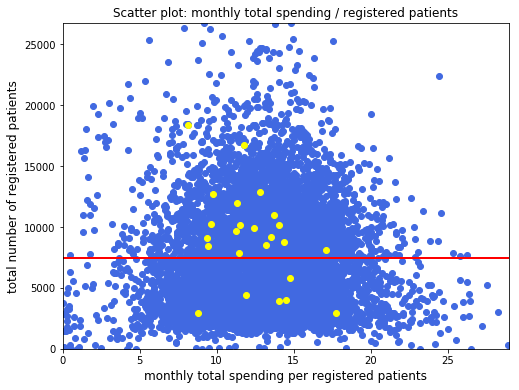

In [102]:
#The blue points represented to the monthly total spending per registered patients for all GP-practices
#The red line is the trend line
#The yellow points represented to the monthly total spending per registered patients for Bournemouth.



from math import floor

fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111)
x= prac_patient_spend_table['cost_per_patient']
y = prac_patient_spend_table['Total_All']
w = BM_prac_patient_spend['cost_per_patient']
z = BM_prac_patient_spend['Total_All']
ax.scatter(x, y, color='royalblue')
ax.scatter(w,z, color='yellow')
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.set_title('Scatter plot: monthly total spending / registered patients')
ax.set_xlabel("monthly total spending per registered patients",fontsize=12)
ax.set_ylabel("total number of registered patients",fontsize=12)
max_x = floor(prac_patient_spend_table.cost_per_patient.quantile(.996))
max_y = floor(prac_patient_spend_table.Total_All.quantile(.996))
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)




In [100]:
#QUESTION B
#4  Visualize the relative costs per patient of all national GP-practices in a histogram.  

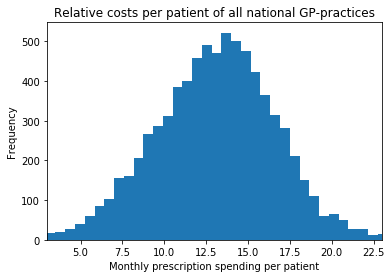

In [103]:

x = prac_patient_spend_table.cost_per_patient.values

plt.hist(x, bins=100000)
plt.xlabel("Monthly prescription spending per patient")
plt.ylabel("Frequency")

min_x = floor(prac_patient_spend_table['cost_per_patient'].quantile(.01))
max_x = floor(prac_patient_spend_table['cost_per_patient'].quantile(.99))
plt.xlim(min_x, max_x) #do not show outliers
plt.title("Relative costs per patient of all national GP-practices")
plt.show()

In [ ]:
#QUESTION B
#5  Use descriptive statistics to show how your assigned city compares to the national level.

In [104]:
BM_prac_patient_spend.head(5)

,PRACTICE,ACT COST,POSTCODE,Total_All,Total_Male,Total_Female,cost_per_patient
4256,J81003,85254.50,BH9 1BP,9119,4674,4445,9.349106
4257,J81004,112164.93,BH2 5QR,8506,4360,4146,13.186566
4265,J81014,196970.73,BH4 9HJ,16761,8247,8514,11.751729
4268,J81018,150752.71,BH6 5AJ,10958,5462,5496,13.757320
4271,J81021,135113.16,BH5 1LX,11959,6113,5846,11.298032


In [105]:
prac_patient_spend_table.head(5)

,PRACTICE,ACT COST,POSTCODE,Total_All,Total_Male,Total_Female,cost_per_patient
0,A81001,83220.57,TS18 1HU,4234,2061,2173,19.655307
1,A81002,333514.67,TS18 2AW,19691,9706,9985,16.937417
2,A81003,47977.16,TS26 8DB,3357,1779,1578,14.291677
3,A81004,147494.85,TS1 3BE,9151,4774,4377,16.117894
4,A81005,107669.51,TS14 7DJ,7883,3826,4057,13.658443


In [106]:
#percentage of patients. From the result, we can see that the total number of patients in Bournemouth is only 0.37% 
#of national total number of patients, which is quite small amount of people.

In [110]:
BM_patient_number = float(BM_prac_patient_spend.Total_All.sum())
BM_patient_number

218010.0

In [111]:
Nation_patient_number = float(prac_patient_spend_table.Total_All.sum())
Nation_patient_number

57537706.0

In [109]:
BM_patient_perc = (BM_patient_number/Nation_patient_number)*100
BM_patient_perc

0.37889936036031746

In [112]:
#Compare the mean of cost per patient in Bournemouth and national level.
#First, we directly calculate the mean of cost per patient in both levels, 
#and we can see that the mean of cost per patient in national level is much higher than in the Bournemouth.
#The mean of cost per patient in national level is 21.32 and in the Bournemouth is only 12.36

In [113]:
BM_cost_per_patient_ave = float(BM_prac_patient_spend.cost_per_patient.mean())
BM_cost_per_patient_ave

12.364683312764905

In [114]:
Nation_cost_per_patient_ave = float(prac_patient_spend_table.cost_per_patient.mean())
Nation_cost_per_patient_ave

21.31731637428685

In [115]:
cost_per_patient_compar = BM_cost_per_patient_ave/Nation_cost_per_patient_ave
cost_per_patient_compar

0.5800300138942115

In [116]:
#However, there are some outliers in the national level dataset, thus I chose to control the influence of outlier, 
#and then compare the 'true' mean of cost per patient in both levels. 
#After getting rid of outliers in the national level, we can see that the mean of cost per patient in national level is 
#similar to the mean in the Bournemouth.
#The adjust mean of cost per patient in national level is 13.04, 
#which is similar to the mean of cost per patient in the Bournemouth.

In [117]:
wo_outlier_nation_patient_spending = prac_patient_spend_table[prac_patient_spend_table['cost_per_patient'] <= 
                                                              prac_patient_spend_table['cost_per_patient'].quantile(.996)]
wo_outlier_Nation_cost_per_patient_ave = float(wo_outlier_nation_patient_spending.cost_per_patient.mean())
wo_outlier_Nation_cost_per_patient_ave

13.039424745301321

In [118]:
BM_cost_per_patient_ave

12.364683312764905

In [119]:
wo_outlier_cost_per_patient_compar = BM_cost_per_patient_ave/wo_outlier_Nation_cost_per_patient_ave
wo_outlier_cost_per_patient_compar

0.9482537423455314

In [120]:
#The standard deviation of costs per patient of all national GP-practices is higher than in Bournemouth

In [121]:
BM_cost_per_patient_std = float(BM_prac_patient_spend.cost_per_patient.std())
BM_cost_per_patient_std

2.4941727409174494

In [122]:
wo_outlier_Nation_cost_per_patient_std = float(wo_outlier_nation_patient_spending.cost_per_patient.std())
wo_outlier_Nation_cost_per_patient_std

3.751469393337777

In [119]:
#The median value of costs per patient of all national GP-practices is higher than in Bournemouth

In [123]:
BM_cost_per_patient_med = float(BM_prac_patient_spend.cost_per_patient.median())
BM_cost_per_patient_med

12.170258738515898

In [124]:
wo_outlier_Nation_cost_per_patient_med = float(wo_outlier_nation_patient_spending.cost_per_patient.median())
wo_outlier_Nation_cost_per_patient_med

13.187161957059875

In [125]:
#quartile range for cost per patient in national level is 25% 10.68, 50% 13.19, 75% 15.46, which is similar to in the Bournemouth
#In the Bournemouth, quartile range is 25% 10.9, 50% 12.17, 75% 14.05, 

In [126]:
wo_outlier_nation_patient_spending.describe()

,ACT COST,Total_All,Total_Male,Total_Female,cost_per_patient
count,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000
mean,97792.442532,7497.625815,3732.669361,3764.956454,13.039425
std,65619.381882,4595.640210,2266.450254,2339.997369,3.751469
min,2.410000,4.000000,4.000000,0.000000,0.001872
25%,48044.600000,4061.250000,2048.000000,2001.250000,10.678388
50%,84668.435000,6665.500000,3311.500000,3342.000000,13.187162
75%,133742.105000,10019.750000,4952.500000,5051.000000,15.463424
max,923786.260000,60352.000000,30555.000000,29797.000000,28.936081


In [127]:
BM_prac_patient_spend.describe()

,ACT COST,Total_All,Total_Male,Total_Female,cost_per_patient
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,108386.489167,9083.750000,4556.708333,4527.041667,12.364683
std,41337.176389,3919.753844,1945.946098,1986.727536,2.494173
min,25862.510000,2931.000000,1494.000000,1378.000000,8.135837
25%,83854.870000,7348.000000,3638.000000,3710.000000,10.904499
50%,114734.805000,9148.500000,4621.500000,4457.000000,12.170259
75%,136046.630000,10442.750000,5418.500000,5345.250000,14.053481
max,196970.730000,18362.000000,8959.000000,9403.000000,17.778451


In [128]:
#QUESTION C
#1  Identify for all GP-practices the relative costs per patient for all statin prescriptions 
#   (simvastatin, atorvastatin, rosuvastatin, pravastatin, fluvastatin) by using the dataset from December 2015.

In [129]:
url_english_deprivation_indices = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/deprivation-by-postcode.csv'
url_CVD_mortality_rate = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/NHSOF_1.1_I00656_D.csv'

In [130]:
edi_dt = pd.read_csv(url_english_deprivation_indices)
edi_dt['Postcode'] = edi_dt['Postcode'].map(lambda x: x.strip())
edi_dt.head(10)

,Postcode,Postcode Status,LSOA code,LSOA Name,Index of Multiple Deprivation Rank,Index of Multiple Deprivation Decile,Income Rank,Income Decile,Income Score,Employment Rank,...,Barriers to Housing and Services Rank,Barriers to Housing and Services Decile,Living Environment Rank,Living Environment Decile,IDACI Rank,IDACI Decile,IDACI Score,IDAOPI Rank,IDAOPI Decile,IDAOPI Score
0,TS18 1HU,Live,E01033477,Stockton-on-Tees 014G E01033477,73.0,1.0,196.0,1.0,0.474,123.0,...,20035.0,7.0,2868.0,1.0,2226.0,1.0,0.422,817.0,1.0,0.500
1,TS18 2AW,Live,E01012267,Stockton-on-Tees 014F E01012267,551.0,1.0,433.0,1.0,0.434,215.0,...,25114.0,8.0,16862.0,6.0,4415.0,2.0,0.354,427.0,1.0,0.552
2,TS26 8DB,Live,E01011999,Hartlepool 007D E01011999,967.0,1.0,746.0,1.0,0.402,678.0,...,27634.0,9.0,6264.0,2.0,1071.0,1.0,0.481,2268.0,1.0,0.409
3,TS1 3BE,Live,E01012068,Middlesbrough 001A E01012068,1914.0,1.0,3124.0,1.0,0.306,6166.0,...,16397.0,5.0,4060.0,2.0,2212.0,1.0,0.422,948.0,1.0,0.488
4,TS14 7DJ,Live,E01012117,Redcar and Cleveland 018A E01012117,7082.0,3.0,5343.0,2.0,0.252,4058.0,...,31777.0,10.0,19703.0,6.0,6666.0,3.0,0.300,5907.0,2.0,0.299
5,TS18 2AT,Live,E01012267,Stockton-on-Tees 014F E01012267,551.0,1.0,433.0,1.0,0.434,215.0,...,25114.0,8.0,16862.0,6.0,4415.0,2.0,0.354,427.0,1.0,0.552
6,TS24 7PW,Live,E01011999,Hartlepool 007D E01011999,967.0,1.0,746.0,1.0,0.402,678.0,...,27634.0,9.0,6264.0,2.0,1071.0,1.0,0.481,2268.0,1.0,0.409
7,TS6 6TD,Live,E01033470,Redcar and Cleveland 022G E01033470,664.0,1.0,520.0,1.0,0.422,274.0,...,27372.0,9.0,24413.0,8.0,1126.0,1.0,0.477,1840.0,1.0,0.429
8,TS5 6HF,Live,E01012078,Middlesbrough 005A E01012078,2155.0,1.0,1945.0,1.0,0.343,2629.0,...,25935.0,8.0,2454.0,1.0,659.0,1.0,0.510,3897.0,2.0,0.349
9,TS24 7PW,Live,E01011999,Hartlepool 007D E01011999,967.0,1.0,746.0,1.0,0.402,678.0,...,27634.0,9.0,6264.0,2.0,1071.0,1.0,0.481,2268.0,1.0,0.409


In [131]:
CVD_MR_dt = pd.read_csv(url_CVD_mortality_rate)
CVD_MR_dt.head(10)

,Year,Period of coverage,Breakdown,Level,Level description,Gender,Age,Indicator value,Lower CI,Upper CI,Numerator,Denominator
0,2016,1/1/2016 to 31/12/2016,England,England,England,Person,All,72.7,71.9,73.5,"33,816","50,798,600"
1,2015,1/1/2015 to 31/12/2015,England,England,England,Person,All,74,73.3,74.8,"33,664","50,360,500"
2,2014,1/1/2014 to 31/12/2014,England,England,England,Person,All,73.8,73,74.6,"32,895","49,941,800"
3,2013,1/1/2013 to 31/12/2013,England,England,England,Person,All,76.6,75.7,77.4,"33,408","49,584,200"
4,2012,1/1/2012 to 31/12/2012,England,England,England,Person,All,77.7,76.8,78.5,"33,258","49,281,700"
5,2011,1/1/2011 to 31/12/2011,England,England,England,Person,All,80.5,79.6,81.3,"33,783","48,969,700"
6,2010,1/1/2010 to 31/12/2010,England,England,England,Person,All,89.5,88.6,90.4,"37,155","48,569,300"
7,2009,1/1/2009 to 31/12/2009,England,England,England,Person,All,91.8,90.9,92.7,"37,480","48,183,900"
8,2008,1/1/2008 to 31/12/2008,England,England,England,Person,All,98.8,97.8,99.8,"39,590","47,839,700"
9,2007,1/1/2007 to 31/12/2007,England,England,England,Person,All,103.9,102.9,104.9,"40,842","47,442,600"


In [132]:
#Nystatin is also a kind of statin ?

#Select all statin prescriptions
pres_statin_dt = pres_dt.loc[pres_dt['BNF NAME'].str.contains('statin')]
pres_statin_dt.head(5)

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,
102,Q44,RXA,Y00327,0212000B0AAACAC,Atorvastatin_Tab 40mg,2,1.67,1.67,29,201512,
103,Q44,RXA,Y00327,0212000Y0AAABAB,Simvastatin_Tab 20mg,1,0.10,0.20,3,201512,
274,Q44,RXA,Y00327,0502030B0AAABAB,Nystatin_Oral Susp 100 000u/ml,10,25.90,24.08,300,201512,
512,Q44,RXA,Y04109,0502030B0AAABAB,Nystatin_Oral Susp 100 000u/ml,1,2.59,2.41,30,201512,
647,Q44,RY7,N85638,0212000B0AAABAB,Atorvastatin_Tab 20mg,1,0.70,0.76,14,201512,


In [133]:
#Calculate total actual cost of statin for each practice
pres_statin_total_cost = pres_statin_dt.groupby(['PRACTICE'],as_index=False)['ACT COST'].sum()
pres_statin_total_cost.head(5)

,PRACTICE,ACT COST
0,A81001,1816.80
1,A81002,6530.36
2,A81003,868.39
3,A81004,2139.41
4,A81005,1891.93


In [134]:
#Get a table of practices which have statin prescriptions, and the total number of patients of those practices
prac_statin_patient_spend_table = pd.merge(pres_statin_total_cost, prac_patient_num, 
                                    left_on='PRACTICE', right_on='GP_PRACTICE_CODE', how='inner')
prac_statin_patient_spend_table.drop('GP_PRACTICE_CODE', axis=1, inplace=True)
prac_statin_patient_spend_table.head(5)

,PRACTICE,ACT COST,POSTCODE,Total_All,Total_Male,Total_Female
0,A81001,1816.80,TS18 1HU,4234,2061,2173
1,A81002,6530.36,TS18 2AW,19691,9706,9985
2,A81003,868.39,TS26 8DB,3357,1779,1578
3,A81004,2139.41,TS1 3BE,9151,4774,4377
4,A81005,1891.93,TS14 7DJ,7883,3826,4057


In [135]:
#Calculate relative costs per patient for all statin prescriptions
prac_statin_patient_spend_table['cost_per_patient'] = prac_statin_patient_spend_table['ACT COST']/prac_statin_patient_spend_table['Total_All']

In [136]:
#all GP-practices the relative costs per patient for all statin prescriptions

prac_statin_patient_spend_table

,PRACTICE,ACT COST,POSTCODE,Total_All,Total_Male,Total_Female,cost_per_patient
0,A81001,1816.80,TS18 1HU,4234,2061,2173,0.429098
1,A81002,6530.36,TS18 2AW,19691,9706,9985,0.331642
2,A81003,868.39,TS26 8DB,3357,1779,1578,0.258680
3,A81004,2139.41,TS1 3BE,9151,4774,4377,0.233790
4,A81005,1891.93,TS14 7DJ,7883,3826,4057,0.240001
5,A81006,5022.25,TS18 2AT,12345,6005,6340,0.406825
6,A81007,2252.79,TS24 7PW,9744,4753,4991,0.231198
7,A81008,1398.07,TS6 6TD,4027,2091,1936,0.347174
8,A81009,1614.59,TS5 6HF,9175,4528,4647,0.175977
9,A81011,2953.01,TS24 7PW,11435,5575,5860,0.258243


In [134]:
#QUESTION C
#2  Identify for all GP-practice the associated Index of Multiple Deprivation (IMD) 
#   for each GP-Practice in your assigned city.

In [95]:
#list(edi_dt)

In [146]:
#Since the problem did not told us to select all old and new practice, or just still live practice,
#I decided to select all Bournemouth practices in the English deprivation indices dataset with the condition 
#that the postcode status is Live in order to get rid of those old practice data with old postcode.
#I believe the data of live practice is more useful to do the analysis.

#If the problem want us to use all practice, just delete the condition (edi_dt['Postcode Status'] == 'Live')
#and directly use pd.merge to inner join the edi_dt and prac_BM_dt, then drop the useless columns.


prac_IMD_BM = edi_dt[edi_dt['Postcode'].isin(prac_BM_dt['postcode']) & (edi_dt['Postcode Status'] == 'Live')]
prac_IMD_BM

,Postcode,Postcode Status,LSOA code,LSOA Name,Index of Multiple Deprivation Rank,Index of Multiple Deprivation Decile,Income Rank,Income Decile,Income Score,Employment Rank,...,Barriers to Housing and Services Rank,Barriers to Housing and Services Decile,Living Environment Rank,Living Environment Decile,IDACI Rank,IDACI Decile,IDACI Score,IDAOPI Rank,IDAOPI Decile,IDAOPI Score
3841,BH9 1BP,Live,E01015375,Bournemouth 009D E01015375,14223.0,5.0,15199.0,5.0,0.124,21861.0,...,17892.0,6.0,2052.0,1.0,9744.0,3.0,0.241,5371.0,2.0,0.311
3842,BH2 5QR,Live,E01015372,Bournemouth 023B E01015372,11619.0,4.0,11791.0,4.0,0.157,14821.0,...,21053.0,7.0,4108.0,2.0,13751.0,5.0,0.180,8813.0,3.0,0.243
3850,BH4 9HJ,Live,E01015371,Bournemouth 023A E01015371,8273.0,3.0,10068.0,4.0,0.176,6685.0,...,15226.0,5.0,1240.0,1.0,12672.0,4.0,0.196,5835.0,2.0,0.301
3853,BH6 5AJ,Live,E01015365,Bournemouth 018D E01015365,12390.0,4.0,11459.0,4.0,0.161,11144.0,...,21993.0,7.0,4960.0,2.0,12231.0,4.0,0.203,9608.0,3.0,0.231
3856,BH5 1LX,Live,E01015280,Bournemouth 019C E01015280,3420.0,2.0,6765.0,3.0,0.225,5561.0,...,12137.0,4.0,300.0,1.0,11062.0,4.0,0.220,2209.0,1.0,0.411
3858,BH8 8DE,Live,E01015288,Bournemouth 021B E01015288,3481.0,2.0,4108.0,2.0,0.281,6256.0,...,14224.0,5.0,890.0,1.0,2875.0,1.0,0.399,1554.0,1.0,0.444
3867,BH10 4BX,Live,E01015355,Bournemouth 007C E01015355,19670.0,6.0,15521.0,5.0,0.121,16655.0,...,26917.0,9.0,16243.0,5.0,13155.0,5.0,0.188,17220.0,6.0,0.142
3871,BH10 7AR,Live,E01015301,Bournemouth 001A E01015301,15111.0,5.0,15640.0,5.0,0.120,11430.0,...,23180.0,8.0,18653.0,6.0,14984.0,5.0,0.165,18611.0,6.0,0.130
3872,BH9 2XF,Live,E01015323,Bournemouth 006B E01015323,27509.0,9.0,25066.0,8.0,0.063,24559.0,...,31591.0,10.0,19658.0,6.0,26778.0,9.0,0.061,17115.0,6.0,0.143
3878,BH10 5EY,Live,E01015303,Bournemouth 001B E01015303,11209.0,4.0,10084.0,4.0,0.176,9424.0,...,28481.0,9.0,12583.0,4.0,9947.0,4.0,0.238,12760.0,4.0,0.190


In [139]:
#There are too many columns in the table which are not useful for this problem, thus I choose to delete those columns
list(prac_IMD_BM)

['Postcode',
 'Postcode Status',
 'LSOA code',
 'LSOA Name',
 'Index of Multiple Deprivation Rank',
 'Index of Multiple Deprivation Decile',
 'Income Rank',
 'Income Decile',
 'Income Score',
 'Employment Rank',
 'Employment Decile',
 'Employment Score',
 'Education and Skills Rank',
 'Education and Skills Decile',
 'Health and Disability Rank',
 'Health and Disability Decile',
 'Crime Rank',
 'Crime Decile',
 'Barriers to Housing and Services Rank',
 'Barriers to Housing and Services Decile',
 'Living Environment Rank',
 'Living Environment Decile',
 'IDACI Rank',
 'IDACI Decile',
 'IDACI Score',
 'IDAOPI Rank',
 'IDAOPI Decile',
 'IDAOPI Score']

In [140]:
dropcol2 = [
 'LSOA code',
 'LSOA Name',
 'Income Rank',
 'Income Decile',
 'Income Score',
 'Employment Rank',
 'Employment Decile',
 'Employment Score',
 'Education and Skills Rank',
 'Education and Skills Decile',
 'Health and Disability Rank',
 'Health and Disability Decile',
 'Crime Rank',
 'Crime Decile',
 'Barriers to Housing and Services Rank',
 'Barriers to Housing and Services Decile',
 'Living Environment Rank',
 'Living Environment Decile',
 'IDACI Rank',
 'IDACI Decile',
 'IDACI Score',
 'IDAOPI Rank',
 'IDAOPI Decile',
 'IDAOPI Score']

In [141]:
#Select IMD for each Bournemouth practices' postcodes

prac_only_IMD_dt = prac_IMD_BM.drop(dropcol2, axis=1)
prac_only_IMD_dt.head(5)

,Postcode,Postcode Status,Index of Multiple Deprivation Rank,Index of Multiple Deprivation Decile
3841,BH9 1BP,Live,14223.0,5.0
3842,BH2 5QR,Live,11619.0,4.0
3850,BH4 9HJ,Live,8273.0,3.0
3853,BH6 5AJ,Live,12390.0,4.0
3856,BH5 1LX,Live,3420.0,2.0


In [142]:
#Link the Bournemouth practice postcode to Bournemouth practice

prac_IMD_BM_final_table = pd.merge(prac_BM_dt, prac_only_IMD_dt, 
                                    left_on='postcode', right_on='Postcode', how='inner')
prac_IMD_BM_final_table.drop(['postcode'], axis=1, inplace=True)
prac_IMD_BM_final_table

,period,practice,clinic_name,address,road,city,county,Postcode,Postcode Status,Index of Multiple Deprivation Rank,Index of Multiple Deprivation Decile
0,201512,J81003,ALMA PARTNERSHIP,ALMA MEDICAL CENTRE,31 ALMA ROAD WINTON,BOURNEMOUTH,DORSET,BH9 1BP,Live,14223.0,5.0
1,201512,J81004,POOLE ROAD MEDICAL CENTRE,POOLE ROAD MEDICAL CENTRE,7 POOLE ROAD WESTBOURNE,BOURNEMOUTH,DORSET,BH2 5QR,Live,11619.0,4.0
2,201512,J81014,WESTBOURNE MEDICAL CENTRE,WESTBOURNE MEDICAL CENTRE,MILBURN ROAD WESTBOURNE,BOURNEMOUTH,DORSET,BH4 9HJ,Live,8273.0,3.0
3,201512,J81018,BEAUFORT ROAD SURGERY,BEAUFORT ROAD SURGERY,21 BEAUFORT ROAD,SOUTHBOURNE BOURNEMOUTH,DORSET,BH6 5AJ,Live,12390.0,4.0
4,201512,J81021,SHELLEY MANOR MEDICAL CENTRE,SHELLEY MANOR MED CTR,BEECHWOOD AVENUE,BOURNEMOUTH,DORSET,BH5 1LX,Live,3420.0,2.0
5,201512,J81024,HOLDENHURST ROAD SURGERY,HOLDENHURST ROAD SURGERY,199 HOLDENHURST ROAD,BOURNEMOUTH,DORSET,BH8 8DE,Live,3481.0,2.0
6,201512,J81033,TALBOT MEDICAL CENTRE,TALBOT MEDICAL CENTRE,63 KINSON RD WALLISDOWN,BOURNEMOUTH,DORSET,BH10 4BX,Live,19670.0,6.0
7,201512,J81038,NORTHBOURNE SURGERY,NORTHBOURNE SURGERY,1368 WIMBORNE ROAD,NORTHBOURNE,BOURNEMOUTH,BH10 7AR,Live,15111.0,5.0
8,201512,J81039,MOORDOWN MEDICAL CENTRE,MOORDOWN MEDICAL CENTRE,2A REDHILL CRES MOORDOWN,BOURNEMOUTH,DORSET,BH9 2XF,Live,27509.0,9.0
9,201512,J81045,KINSON ROAD MEDICAL CENTRE,KINSON ROAD MEDICAL CTR,440 KINSON RD KINSON,BOURNEMOUTH,DORSET,BH10 5EY,Live,11209.0,4.0


In [143]:
#In the table, I find that there are some practices have been duplicated 2 times, 
#and I want all unique practices appeared only once.


# All GP-practice the associated Index of Multiple Deprivation (IMD) for each GP-Practice in Bournemouth
IMD_BM_prac_real_final = prac_IMD_BM_final_table.drop_duplicates(subset=['practice'])
IMD_BM_prac_real_final

,period,practice,clinic_name,address,road,city,county,Postcode,Postcode Status,Index of Multiple Deprivation Rank,Index of Multiple Deprivation Decile
0,201512,J81003,ALMA PARTNERSHIP,ALMA MEDICAL CENTRE,31 ALMA ROAD WINTON,BOURNEMOUTH,DORSET,BH9 1BP,Live,14223.0,5.0
1,201512,J81004,POOLE ROAD MEDICAL CENTRE,POOLE ROAD MEDICAL CENTRE,7 POOLE ROAD WESTBOURNE,BOURNEMOUTH,DORSET,BH2 5QR,Live,11619.0,4.0
2,201512,J81014,WESTBOURNE MEDICAL CENTRE,WESTBOURNE MEDICAL CENTRE,MILBURN ROAD WESTBOURNE,BOURNEMOUTH,DORSET,BH4 9HJ,Live,8273.0,3.0
3,201512,J81018,BEAUFORT ROAD SURGERY,BEAUFORT ROAD SURGERY,21 BEAUFORT ROAD,SOUTHBOURNE BOURNEMOUTH,DORSET,BH6 5AJ,Live,12390.0,4.0
4,201512,J81021,SHELLEY MANOR MEDICAL CENTRE,SHELLEY MANOR MED CTR,BEECHWOOD AVENUE,BOURNEMOUTH,DORSET,BH5 1LX,Live,3420.0,2.0
5,201512,J81024,HOLDENHURST ROAD SURGERY,HOLDENHURST ROAD SURGERY,199 HOLDENHURST ROAD,BOURNEMOUTH,DORSET,BH8 8DE,Live,3481.0,2.0
6,201512,J81033,TALBOT MEDICAL CENTRE,TALBOT MEDICAL CENTRE,63 KINSON RD WALLISDOWN,BOURNEMOUTH,DORSET,BH10 4BX,Live,19670.0,6.0
7,201512,J81038,NORTHBOURNE SURGERY,NORTHBOURNE SURGERY,1368 WIMBORNE ROAD,NORTHBOURNE,BOURNEMOUTH,BH10 7AR,Live,15111.0,5.0
8,201512,J81039,MOORDOWN MEDICAL CENTRE,MOORDOWN MEDICAL CENTRE,2A REDHILL CRES MOORDOWN,BOURNEMOUTH,DORSET,BH9 2XF,Live,27509.0,9.0
9,201512,J81045,KINSON ROAD MEDICAL CENTRE,KINSON ROAD MEDICAL CTR,440 KINSON RD KINSON,BOURNEMOUTH,DORSET,BH10 5EY,Live,11209.0,4.0


In [147]:
#QUESTION C
#3  Use the entire national dataset and identify the lowest relative spenders of statins from the first decile 
#   and the highest relative spenders of statins from the last decile. 
#   Now determine for all identified GP-practices for both groups (lowest and the highest) 
#   the associated Index of Multiple Deprivation (IMD). Use these two groups to assess whether the IMD-score differs. 
#   Use descriptive statistics for your answer.

In [148]:
#The quantile 0-10 is first decile, the quantile 90-100 is last decile


# Another way to select first decile and last decile is using following command
#pd.qcut(prac_statin_patient_spend_table.cost_per_patient,10)

In [149]:
#the lowest relative spenders of statins from the first decile crude table

Statin_lowest_spender_crude = prac_statin_patient_spend_table[
    prac_statin_patient_spend_table['cost_per_patient'] 
    <= prac_statin_patient_spend_table['cost_per_patient'].quantile(0.1)]
Statin_lowest_spender_crude

,PRACTICE,ACT COST,POSTCODE,Total_All,Total_Male,Total_Female,cost_per_patient
70,A81621,180.39,TS3 9NB,2245,1128,1117,0.080352
74,A81630,17.86,TS5 4EQ,712,538,174,0.025084
76,A81632,31.51,TS18 1HU,664,515,149,0.047455
77,A81633,11.69,TS1 5EF,917,658,259,0.012748
78,A81634,32.48,TS18 2EP,1533,990,543,0.021187
142,A82613,65.50,LA21 8ER,967,497,470,0.067735
146,A82623,582.79,CA14 2RW,5271,2651,2620,0.110565
164,A83011,3198.48,DH1 1QW,28350,14029,14321,0.112821
211,A83068,0.89,SR8 4PF,164,120,44,0.005427
254,A84025,50.34,NE23 6QN,5296,2718,2578,0.009505


In [150]:
#the highest relative spenders of statins from the last decile crude table

Statin_highest_spender_crude = prac_statin_patient_spend_table[
    prac_statin_patient_spend_table['cost_per_patient'] 
    > prac_statin_patient_spend_table['cost_per_patient'].quantile(0.9)]
Statin_highest_spender_crude

,PRACTICE,ACT COST,POSTCODE,Total_All,Total_Male,Total_Female,cost_per_patient
0,A81001,1816.80,TS18 1HU,4234,2061,2173,0.429098
5,A81006,5022.25,TS18 2AT,12345,6005,6340,0.406825
22,A81025,1868.30,TS18 1HU,4162,2096,2066,0.448895
57,A81066,1638.63,TS21 1JS,4281,2126,2155,0.382768
63,A81608,1109.36,TS17 6NP,2955,1506,1449,0.375418
72,A81623,1288.78,TS18 2EP,1740,930,810,0.740678
89,A82014,1735.20,CA7 8DS,4259,2148,2111,0.407420
123,A82050,3773.50,CA14 2AJ,7134,3536,3598,0.528946
133,A82065,1512.97,LA11 7JY,2939,1452,1487,0.514791
151,A82647,1143.45,LA11 6PH,2407,1192,1215,0.475052


In [151]:
Statin_lowest_spender_mid = pd.merge(edi_dt, Statin_lowest_spender_crude, 
                                     left_on='Postcode', right_on='POSTCODE', how='inner')
list(Statin_lowest_spender_mid)

['Postcode',
 'Postcode Status',
 'LSOA code',
 'LSOA Name',
 'Index of Multiple Deprivation Rank',
 'Index of Multiple Deprivation Decile',
 'Income Rank',
 'Income Decile',
 'Income Score',
 'Employment Rank',
 'Employment Decile',
 'Employment Score',
 'Education and Skills Rank',
 'Education and Skills Decile',
 'Health and Disability Rank',
 'Health and Disability Decile',
 'Crime Rank',
 'Crime Decile',
 'Barriers to Housing and Services Rank',
 'Barriers to Housing and Services Decile',
 'Living Environment Rank',
 'Living Environment Decile',
 'IDACI Rank',
 'IDACI Decile',
 'IDACI Score',
 'IDAOPI Rank',
 'IDAOPI Decile',
 'IDAOPI Score',
 'PRACTICE',
 'ACT COST',
 'POSTCODE',
 'Total_All',
 'Total_Male',
 'Total_Female',
 'cost_per_patient']

In [152]:
dropcol9 = [
 'LSOA code',
 'LSOA Name',
 'Income Rank',
 'Income Decile',
 'Income Score',
 'Employment Rank',
 'Employment Decile',
 'Employment Score',
 'Education and Skills Rank',
 'Education and Skills Decile',
 'Health and Disability Rank',
 'Health and Disability Decile',
 'Crime Rank',
 'Crime Decile',
 'Barriers to Housing and Services Rank',
 'Barriers to Housing and Services Decile',
 'Living Environment Rank',
 'Living Environment Decile',
 'IDACI Rank',
 'IDACI Decile',
 'IDACI Score',
 'IDAOPI Rank',
 'IDAOPI Decile',
 'IDAOPI Score',
 'ACT COST',
 'POSTCODE',
 'Total_Male',
 'Total_Female']

In [153]:
Statin_lowest_spender_mid.drop(dropcol9, axis=1, inplace=True)

In [154]:
Statin_lowest_spender_mid.head()

,Postcode,Postcode Status,Index of Multiple Deprivation Rank,Index of Multiple Deprivation Decile,PRACTICE,Total_All,cost_per_patient
0,TS18 1HU,Live,73.0,1.0,A81632,664,0.047455
1,TS18 1HU,Live,73.0,1.0,A81632,664,0.047455
2,TS18 1HU,Live,73.0,1.0,A81632,664,0.047455
3,TS18 1HU,Live,73.0,1.0,A81632,664,0.047455
4,TS3 6AL,Live,59.0,1.0,Y02483,4947,0.104932


In [155]:
#After merge two tables, I found that there is a duplicated data problem. For instance, in Statin_lowest_spender table, 
#there only one record of postcode 'TS18 1HU', but after the table merged with EDI table, there are 4 record for this postcode


Statin_lowest_spender_mid[Statin_lowest_spender_mid['Postcode'] == 'TS18 1HU']

,Postcode,Postcode Status,Index of Multiple Deprivation Rank,Index of Multiple Deprivation Decile,PRACTICE,Total_All,cost_per_patient
0,TS18 1HU,Live,73.0,1.0,A81632,664,0.047455
1,TS18 1HU,Live,73.0,1.0,A81632,664,0.047455
2,TS18 1HU,Live,73.0,1.0,A81632,664,0.047455
3,TS18 1HU,Live,73.0,1.0,A81632,664,0.047455


In [156]:
Statin_lowest_spender_crude[Statin_lowest_spender_crude['POSTCODE'] == 'TS18 1HU']

,PRACTICE,ACT COST,POSTCODE,Total_All,Total_Male,Total_Female,cost_per_patient
76,A81632,31.51,TS18 1HU,664,515,149,0.047455


In [157]:
#I find that in the English deprivation indices table, 
#there are some practices have exactly same information, and it will cause duplicated data problem during the inner join
#process. I believe this problem happened is because the English deprivation indices table assume that the practices in 
#the same postcode have same statistics.
#Since the same postcode have same statistics, I only need to left one record for each postcode in EDI table.
#thus I choose to remove these duplicated practice by using postcode


#It is reasonable that there are some practices share one postcode since some practices can be in the same building 
edi_dt[edi_dt['Postcode'] == 'TS18 1HU']

,Postcode,Postcode Status,LSOA code,LSOA Name,Index of Multiple Deprivation Rank,Index of Multiple Deprivation Decile,Income Rank,Income Decile,Income Score,Employment Rank,...,Barriers to Housing and Services Rank,Barriers to Housing and Services Decile,Living Environment Rank,Living Environment Decile,IDACI Rank,IDACI Decile,IDACI Score,IDAOPI Rank,IDAOPI Decile,IDAOPI Score
0,TS18 1HU,Live,E01033477,Stockton-on-Tees 014G E01033477,73.0,1.0,196.0,1.0,0.474,123.0,...,20035.0,7.0,2868.0,1.0,2226.0,1.0,0.422,817.0,1.0,0.5
22,TS18 1HU,Live,E01033477,Stockton-on-Tees 014G E01033477,73.0,1.0,196.0,1.0,0.474,123.0,...,20035.0,7.0,2868.0,1.0,2226.0,1.0,0.422,817.0,1.0,0.5
7398,TS18 1HU,Live,E01033477,Stockton-on-Tees 014G E01033477,73.0,1.0,196.0,1.0,0.474,123.0,...,20035.0,7.0,2868.0,1.0,2226.0,1.0,0.422,817.0,1.0,0.5
9111,TS18 1HU,Live,E01033477,Stockton-on-Tees 014G E01033477,73.0,1.0,196.0,1.0,0.474,123.0,...,20035.0,7.0,2868.0,1.0,2226.0,1.0,0.422,817.0,1.0,0.5


In [158]:
edi_dt_adj = edi_dt.drop_duplicates(subset=['Postcode'])

Statin_lowest_spender_final = pd.merge(edi_dt_adj, Statin_lowest_spender_crude, 
                                     left_on='Postcode', right_on='POSTCODE', how='inner')

Statin_lowest_spender_final.drop(dropcol9, axis=1, inplace=True)

In [159]:
#GP-practices for lowest groups the associated Index of Multiple Deprivation (IMD)
Statin_lowest_spender_final

,Postcode,Postcode Status,Index of Multiple Deprivation Rank,Index of Multiple Deprivation Decile,PRACTICE,Total_All,cost_per_patient
0,TS18 1HU,Live,73.0,1.0,A81632,664,0.047455
1,TS3 6AL,Live,59.0,1.0,Y02483,4947,0.104932
2,TS3 9NB,Live,376.0,1.0,A81621,2245,0.080352
3,TS18 2EP,Live,1428.0,1.0,A81634,1533,0.021187
4,LA21 8ER,Live,17679.0,6.0,A82613,967,0.067735
5,CA14 2RW,Live,3099.0,1.0,A82623,5271,0.110565
6,DH1 1QW,Live,23986.0,8.0,A83011,28350,0.112821
7,SR8 4PF,Live,6877.0,3.0,A83068,164,0.005427
8,NE23 6QN,Live,15790.0,5.0,A84025,5296,0.009505
9,NE1 8DQ,Live,16382.0,5.0,A86003,32431,0.123063


In [160]:
#Same thing happened in the highest group

Statin_highest_spender_final = pd.merge(edi_dt_adj, Statin_highest_spender_crude, 
                                     left_on='Postcode', right_on='POSTCODE', how='inner')

Statin_highest_spender_final.drop(dropcol9, axis=1, inplace=True)

In [161]:
#GP-practices for highest groups the associated Index of Multiple Deprivation (IMD)

#The final Statin_highest_spender_final table has one low less than the Statin_highest_spender_crude table.
#I think the reason is that there is one practice, which did not be included in the EDI table, thus there is one missing.

Statin_highest_spender_final

,Postcode,Postcode Status,Index of Multiple Deprivation Rank,Index of Multiple Deprivation Decile,PRACTICE,Total_All,cost_per_patient
0,TS18 1HU,Live,73.0,1.0,A81001,4234,0.429098
1,TS18 1HU,Live,73.0,1.0,A81025,4162,0.448895
2,TS18 2AT,Live,551.0,1.0,A81006,12345,0.406825
3,TS21 1JS,Live,15355.0,5.0,A81066,4281,0.382768
4,TS17 6NP,Live,788.0,1.0,A81608,2955,0.375418
5,TS18 2EP,Live,1428.0,1.0,A81623,1740,0.740678
6,CA7 8DS,Live,18333.0,6.0,A82014,4259,0.407420
7,CA14 2AJ,Live,3099.0,1.0,A82050,7134,0.528946
8,LA11 7JY,Live,20422.0,7.0,A82065,2939,0.514791
9,LA11 6PH,Live,26437.0,9.0,A82647,2407,0.475052


In [ ]:
#Use these two groups to assess whether the IMD-score differs. Use descriptive statistics for your answer.


In [162]:
#Compare the mean of Index of Multiple Deprivation Rank in two groups, we can find that the mean of high group
#is higher than the low group, the mean of highest group is 14026.26 while the mean of lowest group is 12252.90

high_IMD_mean = Statin_highest_spender_final['Index of Multiple Deprivation Rank'].mean()
high_IMD_mean

14026.26336375489

In [163]:
low_IMD_mean = Statin_lowest_spender_final['Index of Multiple Deprivation Rank'].mean()
low_IMD_mean

12252.904947916666

In [164]:
#Then we compare the median of Index of Multiple Deprivation Rank in two groups, we can find that the median value of high group
#is higher than the low group. The median of highest group is 12933 while the median of lowest group is 9965

high_IMD_med = Statin_highest_spender_final['Index of Multiple Deprivation Rank'].median()
high_IMD_med

12933.0

In [165]:
low_IMD_med = Statin_lowest_spender_final['Index of Multiple Deprivation Rank'].median()
low_IMD_med

9965.0

In [166]:
#Then we compare the max value of Index of Multiple Deprivation Rank in two groups, we can find that the max value of high group
#is similar to the low group, the max of highest group is 32701 while the max of lowest group is 32837

In [167]:
high_IMD_max = Statin_highest_spender_final['Index of Multiple Deprivation Rank'].max()
high_IMD_max

32701.0

In [168]:
low_IMD_max = Statin_lowest_spender_final['Index of Multiple Deprivation Rank'].max()
low_IMD_max

32837.0

In [169]:
#Then we compare the min value of Index of Multiple Deprivation Rank in two groups, we can find that the min value of high group
#is much higher than the low group.
high_IMD_min = Statin_highest_spender_final['Index of Multiple Deprivation Rank'].min()
high_IMD_min

66.0

In [170]:
low_IMD_min = Statin_lowest_spender_final['Index of Multiple Deprivation Rank'].min()
low_IMD_min

27.0

In [171]:
#Then we compare the standard deviation of Index of Multiple Deprivation Rank in two groups, 
#we can find that the standard deviation of high group is slightly higher than the low group
high_IMD_std = Statin_highest_spender_final['Index of Multiple Deprivation Rank'].std()
high_IMD_std


9312.728702348824

In [172]:
low_IMD_std = Statin_lowest_spender_final['Index of Multiple Deprivation Rank'].std()
low_IMD_std

8885.412977371247

In [173]:
#I calculate the 95% confidence interval for the difference between both groups. The 95% CI did not contain 0, 
#and the lower bound is much higher than 0, which indicates that there is a different in the mean of two groups' IMD score

import math
n1 = len(Statin_highest_spender_final['Index of Multiple Deprivation Rank'])
n2 = len(Statin_lowest_spender_final['Index of Multiple Deprivation Rank'])
m1 = high_IMD_mean
m2 = low_IMD_mean
s1 = high_IMD_std
s2 = low_IMD_std

high_low_IMD_CI = [
    (m1-m2)-1.96*math.sqrt((s1**2/n1)+(s2**2/n2)),
    (m1-m2)+1.96*math.sqrt((s1**2/n1)+(s2**2/n2))]

high_low_IMD_CI

[862.7003242337091, 2684.016507442738]

In [174]:
#According to the previous descriptive statistics result, I can say that the IMD-score is different in two groups

In [175]:
#t-test
#the p-value nearly equals 0.00014, which indicate that the IMD score is different in two groups


In [176]:
from scipy.stats import ttest_ind

In [177]:
ttest_ind(Statin_highest_spender_final['Index of Multiple Deprivation Rank'], Statin_lowest_spender_final['Index of Multiple Deprivation Rank'])

Ttest_indResult(statistic=3.816897778974035, pvalue=0.00014051763864582044)

In [ ]:
#QUESTION C
#4  Identify for all GP-practices the associated nine English regions. 
#   Identify for each region the associated 75 mortality rate for cardiovascular diseases for the year 2015.

In [178]:
#First, we need to decide whether we should use region name or region code in order to identify 9 regions
pd.unique(ons_pos['Region Code'])

array(['E12000003', 'E12000007', 'E12000008', 'E12000009', 'E12000006',
       'S99999999', 'E12000004', 'E12000002', 'W99999999', 'E12000001',
       'E12000005', 'N99999999', 'L99999999', 'M99999999', nan],
      dtype=object)

In [179]:
pd.unique(ons_pos['Region Name'])

array(['Yorkshire and The Humber', 'London', 'South East', 'South West',
       'East of England', nan, 'East Midlands', 'North West',
       'North East', 'West Midlands'], dtype=object)

In [ ]:
#As a result, we can see there are more noise value in region code, thus I choose to use region name to identify 9 regions

In [180]:
pd.unique(ons_pos['Country Name'])

array(['England', 'Scotland', 'Wales', 'Northern Ireland',
       'Channel Islands', 'Isle of Man', nan], dtype=object)

In [181]:
#Delete the columns which are not useful in this problem.

list(ons_pos)

['Postcode 1',
 'Postcode 2',
 'Postcode 3',
 'Date Introduced',
 'User Type',
 'Easting',
 'Northing',
 'Positional Quality',
 'County Code',
 'County Name',
 'Local Authority Code',
 'Local Authority Name',
 'Ward Code',
 'Ward Name',
 'Country Code',
 'Country Name',
 'Region Code',
 'Region Name',
 'Parliamentary Constituency Code',
 'Parliamentary Constituency Name',
 'European Electoral Region Code',
 'European Electoral Region Name',
 'Primary Care Trust Code',
 'Primary Care Trust Name',
 'Lower Super Output Area Code',
 'Lower Super Output Area Name',
 'Middle Super Output Area Code',
 'Middle Super Output Area Name',
 'Output Area Classification Code',
 'Output Area Classification Name',
 'Longitude',
 'Latitude',
 'Spatial Accuracy',
 'Last Uploaded',
 'Location',
 'Socrata ID']

In [182]:


dropcol3 = [
 'Date Introduced',
 'User Type',
 'Easting',
 'Northing',
 'Positional Quality',
 'County Code',
 'County Name',
 'Local Authority Code',
 'Local Authority Name',
 'Ward Code',
 'Ward Name',
 'Country Code',
 'Country Name',
 'Parliamentary Constituency Code',
 'Parliamentary Constituency Name',
 'European Electoral Region Code',
 'European Electoral Region Name',
 'Primary Care Trust Code',
 'Primary Care Trust Name',
 'Lower Super Output Area Code',
 'Lower Super Output Area Name',
 'Middle Super Output Area Code',
 'Middle Super Output Area Name',
 'Output Area Classification Code',
 'Output Area Classification Name',
 'Longitude',
 'Latitude',
 'Spatial Accuracy',
 'Last Uploaded',
 'Location',
 'Socrata ID']

In [183]:
ons_pos_left_pc_region = ons_pos.drop(dropcol3, axis=1)
ons_pos_left_pc_region.head(5)

,Postcode 1,Postcode 2,Postcode 3,Region Code,Region Name
0,S20 6RU,S20 6RU,S20 6RU,E12000003,Yorkshire and The Humber
1,TW4 7BD,TW4 7BD,TW4 7BD,E12000007,London
2,GU513ZQ,GU51 3ZQ,GU51 3ZQ,E12000008,South East
3,OX4 6BE,OX4 6BE,OX4 6BE,E12000008,South East
4,TA7 9JH,TA7 9JH,TA7 9JH,E12000009,South West


In [184]:
#There are some NaN in region name, I deleted those rows which contains NaN in Region Name column

ons_pos_left_pc_region_woNa = ons_pos_left_pc_region.dropna(subset = ['Region Name'])
ons_pos_left_pc_region_woNa.head(5)

,Postcode 1,Postcode 2,Postcode 3,Region Code,Region Name
0,S20 6RU,S20 6RU,S20 6RU,E12000003,Yorkshire and The Humber
1,TW4 7BD,TW4 7BD,TW4 7BD,E12000007,London
2,GU513ZQ,GU51 3ZQ,GU51 3ZQ,E12000008,South East
3,OX4 6BE,OX4 6BE,OX4 6BE,E12000008,South East
4,TA7 9JH,TA7 9JH,TA7 9JH,E12000009,South West


In [185]:
#all GP-practices the associated nine English regions.
prac_asso_nine_region = pd.merge(prac_dt, ons_pos_left_pc_region_woNa, 
                                    left_on='postcode', right_on='Postcode 1', how='inner')

prac_asso_nine_region.drop(['postcode'], axis=1, inplace=True)
prac_asso_nine_region


,period,practice,clinic_name,address,road,city,county,Postcode 1,Postcode 2,Postcode 3,Region Code,Region Name
0,201512,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,,MIDDLESBROUGH,CLEVELAND,TS1 3BE,TS1 3BE,TS1 3BE,E12000001,North East
1,201512,A81008,ALBERT HOUSE CLINIC,LOW GRANGE HEALTH VILLAGE,NORMANBY ROAD,MIDDLESBROUGH,CLEVELAND,TS6 6TD,TS6 6TD,TS6 6TD,E12000001,North East
2,201512,A81021,NORMANBY MEDICAL CENTRE,NORMANBY MEDICAL CENTRE,LOW GRANGE HV NORMANBY RD,MIDDLESBROUGH,CLEVELAND,TS6 6TD,TS6 6TD,TS6 6TD,E12000001,North East
3,201512,A81065,THE ESTON SURGERY,LOW GRANGE HEALTH VILLAGE,NORMANBY ROAD,ESTON,CLEVELAND,TS6 6TD,TS6 6TD,TS6 6TD,E12000001,North East
4,201512,Y02499,ESTON GRANGE NHS HEALTH CARE CENTRE,LOW GRANGE HEALTH VILLAGE,NORMANBY ROAD,MIDDLESBROUGH,CLEVELAND,TS6 6TD,TS6 6TD,TS6 6TD,E12000001,North East
5,201512,A81009,VILLAGE MEDICAL CENTRE,THE VILLAGE MEDICAL CTR,400/404 LINTHORPE ROAD,MIDDLESBROUGH,CLEVELAND,TS5 6HF,TS5 6HF,TS5 6HF,E12000001,North East
6,201512,A81012,WESTBOURNE MEDICAL CENTRE,WESTBOURNE MEDICAL CENTRE,7 TRINITY MEWS N. ORMESBY,MIDDLESBROUGH,,TS3 6AL,TS3 6AL,TS3 6AL,E12000001,North East
7,201512,A81033,OAKFIELD MEDICAL PRACTICE,OAKFIELDS MED PRACTICE,1 TRINITY MEWS N. ORMESBY,MIDDLESBROUGH,,TS3 6AL,TS3 6AL,TS3 6AL,E12000001,North East
8,201512,A81038,HIRSEL MEDICAL CENTRE,HIRSEL MEDICAL CENTRE,5 TRINITY MEWS N.ORMESBY,MIDDLESBROUGH,CLEVELAND,TS3 6AL,TS3 6AL,TS3 6AL,E12000001,North East
9,201512,A81049,KINGS MEDICAL CENTRE,KINGS MEDICAL CENTRE,3 TRINITY MEWS N.ORMESBY,MIDDLESBROUGH,,TS3 6AL,TS3 6AL,TS3 6AL,E12000001,North East


In [186]:
#In order to identify for each region the associated 75 mortality rate for cardiovascular diseases for the year 2015
#I take a look of the Under 75 CVD mortality rates dataset, and find the 9 region information contains in the level,
#level description and Breakdown columns


#When the Breakdown column equal to 'Region' value, the dataset will show the information on the region level, 
#and each of the 9 regions will be noted in level and level description columns.


CVD_MR_dt.head()

,Year,Period of coverage,Breakdown,Level,Level description,Gender,Age,Indicator value,Lower CI,Upper CI,Numerator,Denominator
0,2016,1/1/2016 to 31/12/2016,England,England,England,Person,All,72.7,71.9,73.5,"33,816","50,798,600"
1,2015,1/1/2015 to 31/12/2015,England,England,England,Person,All,74,73.3,74.8,"33,664","50,360,500"
2,2014,1/1/2014 to 31/12/2014,England,England,England,Person,All,73.8,73,74.6,"32,895","49,941,800"
3,2013,1/1/2013 to 31/12/2013,England,England,England,Person,All,76.6,75.7,77.4,"33,408","49,584,200"
4,2012,1/1/2012 to 31/12/2012,England,England,England,Person,All,77.7,76.8,78.5,"33,258","49,281,700"


In [187]:
pd.unique(CVD_MR_dt['Breakdown'])

array(['England', 'Region', 'Deprivation decile'], dtype=object)

In [188]:
pd.unique(CVD_MR_dt['Level'])

array(['England', 'E12000004', 'E12000006', 'E12000007', 'E12000001',
       'E12000002', 'E12000008', 'E12000009', 'E12000005', 'E12000003',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype=object)

In [189]:
pd.unique(CVD_MR_dt['Level description'])

array(['England', 'East Midlands', 'East of England', 'London',
       'North East', 'North West', 'South East', 'South West',
       'West Midlands', 'Yorkshire and The Humber', '1 - Most deprived',
       '2', '3', '4', '5', '6', '7', '8', '9', '10 - Least deprived'],
      dtype=object)

In [190]:
#Thus I choose to Year = 2015 in order to find 2015's 75 mortality rate for cardiovascular diseases
#choose Breakdown = 'Region' to find the information in the region level
#And choose Gender = person to show the overall statistics rather than showing the information in males or females
#Since the question only ask to identify for each region the associated 75 mortality rate for cardiovascular diseases for the year 2015.


CVD_MR_9_reg_table = CVD_MR_dt[(CVD_MR_dt['Year'] == 2015) & (CVD_MR_dt['Breakdown'] == 'Region') & (CVD_MR_dt['Gender'] == 'Person')]
CVD_MR_9_reg_table

,Year,Period of coverage,Breakdown,Level,Level description,Gender,Age,Indicator value,Lower CI,Upper CI,Numerator,Denominator
471,2015,1/1/2015 to 31/12/2015,Region,E12000004,East Midlands,Person,All,76.7,74,79.4,"3,171","4,289,500"
472,2015,1/1/2015 to 31/12/2015,Region,E12000006,East of England,Person,All,66.3,64.1,68.5,"3,505","5,541,600"
473,2015,1/1/2015 to 31/12/2015,Region,E12000007,London,Person,All,76.7,74.3,79.1,"4,037","8,208,700"
474,2015,1/1/2015 to 31/12/2015,Region,E12000001,North East,Person,All,86,82.3,89.9,"2,000","2,399,000"
475,2015,1/1/2015 to 31/12/2015,Region,E12000002,North West,Person,All,88.3,86,90.7,"5,413","6,590,500"
476,2015,1/1/2015 to 31/12/2015,Region,E12000008,South East,Person,All,60.8,59,62.5,"4,669","8,171,900"
477,2015,1/1/2015 to 31/12/2015,Region,E12000009,South West,Person,All,64.5,62.3,66.7,"3,316","4,934,700"
478,2015,1/1/2015 to 31/12/2015,Region,E12000005,West Midlands,Person,All,77.9,75.4,80.4,"3,780","5,274,400"
479,2015,1/1/2015 to 31/12/2015,Region,E12000003,Yorkshire and The Humber,Person,All,82.8,80.2,85.5,"3,773","4,950,200"


In [191]:
#This is the information for each region the associated 75 mortality rate for cardiovascular diseases for the year 2015
#With male and female data.
CVD_MR_dt[(CVD_MR_dt['Year'] == 2015) & (CVD_MR_dt['Breakdown'] == 'Region')]

,Year,Period of coverage,Breakdown,Level,Level description,Gender,Age,Indicator value,Lower CI,Upper CI,Numerator,Denominator
471,2015,1/1/2015 to 31/12/2015,Region,E12000004,East Midlands,Person,All,76.7,74,79.4,"3,171","4,289,500"
472,2015,1/1/2015 to 31/12/2015,Region,E12000006,East of England,Person,All,66.3,64.1,68.5,"3,505","5,541,600"
473,2015,1/1/2015 to 31/12/2015,Region,E12000007,London,Person,All,76.7,74.3,79.1,"4,037","8,208,700"
474,2015,1/1/2015 to 31/12/2015,Region,E12000001,North East,Person,All,86,82.3,89.9,"2,000","2,399,000"
475,2015,1/1/2015 to 31/12/2015,Region,E12000002,North West,Person,All,88.3,86,90.7,"5,413","6,590,500"
476,2015,1/1/2015 to 31/12/2015,Region,E12000008,South East,Person,All,60.8,59,62.5,"4,669","8,171,900"
477,2015,1/1/2015 to 31/12/2015,Region,E12000009,South West,Person,All,64.5,62.3,66.7,"3,316","4,934,700"
478,2015,1/1/2015 to 31/12/2015,Region,E12000005,West Midlands,Person,All,77.9,75.4,80.4,"3,780","5,274,400"
479,2015,1/1/2015 to 31/12/2015,Region,E12000003,Yorkshire and The Humber,Person,All,82.8,80.2,85.5,"3,773","4,950,200"
597,2015,1/1/2015 to 31/12/2015,Region,E12000004,East Midlands,Female,All,49,46.1,52.1,"1,030","2,144,400"


In [192]:
#QUESTION C
#5   Visualize (using matplotlib) for each region spending for statins [x-axis] and the mortality rate [y-axis]. 
#    Assess whether relative spending for statin prescriptions in each regions correlates with the mortality rate 
#    from cardiovascular diseases.

In [193]:
#practice in 9 region
prac_asso_nine_region.head()

,period,practice,clinic_name,address,road,city,county,Postcode 1,Postcode 2,Postcode 3,Region Code,Region Name
0,201512,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,,MIDDLESBROUGH,CLEVELAND,TS1 3BE,TS1 3BE,TS1 3BE,E12000001,North East
1,201512,A81008,ALBERT HOUSE CLINIC,LOW GRANGE HEALTH VILLAGE,NORMANBY ROAD,MIDDLESBROUGH,CLEVELAND,TS6 6TD,TS6 6TD,TS6 6TD,E12000001,North East
2,201512,A81021,NORMANBY MEDICAL CENTRE,NORMANBY MEDICAL CENTRE,LOW GRANGE HV NORMANBY RD,MIDDLESBROUGH,CLEVELAND,TS6 6TD,TS6 6TD,TS6 6TD,E12000001,North East
3,201512,A81065,THE ESTON SURGERY,LOW GRANGE HEALTH VILLAGE,NORMANBY ROAD,ESTON,CLEVELAND,TS6 6TD,TS6 6TD,TS6 6TD,E12000001,North East
4,201512,Y02499,ESTON GRANGE NHS HEALTH CARE CENTRE,LOW GRANGE HEALTH VILLAGE,NORMANBY ROAD,MIDDLESBROUGH,CLEVELAND,TS6 6TD,TS6 6TD,TS6 6TD,E12000001,North East


In [194]:
#spending for statins in each practice
prac_statin_patient_spend_table.head()

,PRACTICE,ACT COST,POSTCODE,Total_All,Total_Male,Total_Female,cost_per_patient
0,A81001,1816.80,TS18 1HU,4234,2061,2173,0.429098
1,A81002,6530.36,TS18 2AW,19691,9706,9985,0.331642
2,A81003,868.39,TS26 8DB,3357,1779,1578,0.258680
3,A81004,2139.41,TS1 3BE,9151,4774,4377,0.233790
4,A81005,1891.93,TS14 7DJ,7883,3826,4057,0.240001


In [195]:
#mortality rate
CVD_MR_9_reg_table

,Year,Period of coverage,Breakdown,Level,Level description,Gender,Age,Indicator value,Lower CI,Upper CI,Numerator,Denominator
471,2015,1/1/2015 to 31/12/2015,Region,E12000004,East Midlands,Person,All,76.7,74,79.4,"3,171","4,289,500"
472,2015,1/1/2015 to 31/12/2015,Region,E12000006,East of England,Person,All,66.3,64.1,68.5,"3,505","5,541,600"
473,2015,1/1/2015 to 31/12/2015,Region,E12000007,London,Person,All,76.7,74.3,79.1,"4,037","8,208,700"
474,2015,1/1/2015 to 31/12/2015,Region,E12000001,North East,Person,All,86,82.3,89.9,"2,000","2,399,000"
475,2015,1/1/2015 to 31/12/2015,Region,E12000002,North West,Person,All,88.3,86,90.7,"5,413","6,590,500"
476,2015,1/1/2015 to 31/12/2015,Region,E12000008,South East,Person,All,60.8,59,62.5,"4,669","8,171,900"
477,2015,1/1/2015 to 31/12/2015,Region,E12000009,South West,Person,All,64.5,62.3,66.7,"3,316","4,934,700"
478,2015,1/1/2015 to 31/12/2015,Region,E12000005,West Midlands,Person,All,77.9,75.4,80.4,"3,780","5,274,400"
479,2015,1/1/2015 to 31/12/2015,Region,E12000003,Yorkshire and The Humber,Person,All,82.8,80.2,85.5,"3,773","4,950,200"


In [196]:
#First, I choose to inner join the statin patient spend table and the practices associated with 9 regions table
#in order to find for each practice in 9 region, what is their actual cost for statin.


prac_act_cost_nine_reg = pd.merge(prac_statin_patient_spend_table, prac_asso_nine_region, 
                                    left_on='PRACTICE', right_on='practice', how='inner')
prac_act_cost_nine_reg

,PRACTICE,ACT COST,POSTCODE,Total_All,Total_Male,Total_Female,cost_per_patient,period,practice,clinic_name,address,road,city,county,Postcode 1,Postcode 2,Postcode 3,Region Code,Region Name
0,A81004,2139.41,TS1 3BE,9151,4774,4377,0.233790,201512,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,,MIDDLESBROUGH,CLEVELAND,TS1 3BE,TS1 3BE,TS1 3BE,E12000001,North East
1,A81008,1398.07,TS6 6TD,4027,2091,1936,0.347174,201512,A81008,ALBERT HOUSE CLINIC,LOW GRANGE HEALTH VILLAGE,NORMANBY ROAD,MIDDLESBROUGH,CLEVELAND,TS6 6TD,TS6 6TD,TS6 6TD,E12000001,North East
2,A81009,1614.59,TS5 6HF,9175,4528,4647,0.175977,201512,A81009,VILLAGE MEDICAL CENTRE,THE VILLAGE MEDICAL CTR,400/404 LINTHORPE ROAD,MIDDLESBROUGH,CLEVELAND,TS5 6HF,TS5 6HF,TS5 6HF,E12000001,North East
3,A81012,950.01,TS3 6AL,4749,2478,2271,0.200044,201512,A81012,WESTBOURNE MEDICAL CENTRE,WESTBOURNE MEDICAL CENTRE,7 TRINITY MEWS N. ORMESBY,MIDDLESBROUGH,,TS3 6AL,TS3 6AL,TS3 6AL,E12000001,North East
4,A81016,2177.11,TS1 3QY,9630,5013,4617,0.226076,201512,A81016,PARK SURGERY,PARK SURGERY ONE LIFE,LINTHORPE ROAD,MIDDLESBROUGH,CLEVELAND,TS1 3QY,TS1 3QY,TS1 3QY,E12000001,North East
5,A81019,2255.90,TS3 7RL,10381,4978,5403,0.217310,201512,A81019,CROSSFELL HEALTH CENTRE,CROSSFELL ROAD,BERWICK HILLS,MIDDLESBROUGH,CLEVELAND,TS3 7RL,TS3 7RL,TS3 7RL,E12000001,North East
6,A81020,2735.59,TS4 3BU,7907,3895,4012,0.345971,201512,A81020,MARTONSIDE MEDICAL CENTRE,MARTONSIDE MEDICAL CENTRE,1A MARTONSIDE WAY,MIDDLESBROUGH,CLEVELAND,TS4 3BU,TS4 3BU,TS4 3BU,E12000001,North East
7,A81021,4052.85,TS6 6TD,13189,6436,6753,0.307290,201512,A81021,NORMANBY MEDICAL CENTRE,NORMANBY MEDICAL CENTRE,LOW GRANGE HV NORMANBY RD,MIDDLESBROUGH,CLEVELAND,TS6 6TD,TS6 6TD,TS6 6TD,E12000001,North East
8,A81023,1184.04,TS1 2NX,7674,3968,3706,0.154292,201512,A81023,THE ENDEAVOUR PRACTICE,THE HEALTH CENTRE,20 CLEVELAND SQUARE,MIDDLESBROUGH,CLEVELAND,TS1 2NX,TS1 2NX,TS1 2NX,E12000001,North East
9,A81026,2675.18,TS5 6HA,13758,6893,6865,0.194445,201512,A81026,THE LINTHORPE SURGERY,378 LINTHORPE ROAD,,MIDDLESBROUGH,CLEVELAND,TS5 6HA,TS5 6HA,TS5 6HA,E12000001,North East


In [197]:
#deleted the columns that are not useful for this problem

list(prac_act_cost_nine_reg)

['PRACTICE',
 'ACT COST',
 'POSTCODE',
 'Total_All',
 'Total_Male',
 'Total_Female',
 'cost_per_patient',
 'period',
 'practice',
 'clinic_name',
 'address',
 'road',
 'city',
 'county',
 'Postcode 1',
 'Postcode 2',
 'Postcode 3',
 'Region Code',
 'Region Name']

In [198]:
dropcol4=[
 'Total_Male',
 'Total_Female',
 'cost_per_patient',
 'practice',
 'address',
 'road',
 'city',
 'county',
 'Postcode 1',
 'Postcode 2',
 'Postcode 3']

In [199]:
prac_act_cost_nine_reg_drop = prac_act_cost_nine_reg.drop(dropcol4, axis=1)
prac_act_cost_nine_reg_drop.head()

,PRACTICE,ACT COST,POSTCODE,Total_All,period,clinic_name,Region Code,Region Name
0,A81004,2139.41,TS1 3BE,9151,201512,WOODLANDS ROAD SURGERY,E12000001,North East
1,A81008,1398.07,TS6 6TD,4027,201512,ALBERT HOUSE CLINIC,E12000001,North East
2,A81009,1614.59,TS5 6HF,9175,201512,VILLAGE MEDICAL CENTRE,E12000001,North East
3,A81012,950.01,TS3 6AL,4749,201512,WESTBOURNE MEDICAL CENTRE,E12000001,North East
4,A81016,2177.11,TS1 3QY,9630,201512,PARK SURGERY,E12000001,North East


In [200]:
#get the total actual cost for statins in each region
nine_reg_total_cost = prac_act_cost_nine_reg_drop.groupby(['Region Name'],as_index=False)['ACT COST'].sum()
nine_reg_total_cost

,Region Name,ACT COST
0,East Midlands,521551.05
1,East of England,702306.38
2,London,1028910.23
3,North East,346937.97
4,North West,1408688.17
5,South East,705102.60
6,South West,623490.87
7,West Midlands,1042897.42
8,Yorkshire and The Humber,761188.94


In [201]:
#get the total patients number in each region
nine_reg_total_patient = prac_act_cost_nine_reg_drop.groupby(['Region Name'],as_index=False)['Total_All'].sum()
nine_reg_total_patient

,Region Name,Total_All
0,East Midlands,2451039
1,East of England,3350703
2,London,5821356
3,North East,1314471
4,North West,5448342
5,South East,3371398
6,South West,2601692
7,West Midlands,4298834
8,Yorkshire and The Humber,2979048


In [202]:
nine_reg_cost_patient_final_table = pd.merge(nine_reg_total_patient, nine_reg_total_cost, on='Region Name', how='inner')
nine_reg_cost_patient_final_table

,Region Name,Total_All,ACT COST
0,East Midlands,2451039,521551.05
1,East of England,3350703,702306.38
2,London,5821356,1028910.23
3,North East,1314471,346937.97
4,North West,5448342,1408688.17
5,South East,3371398,705102.60
6,South West,2601692,623490.87
7,West Midlands,4298834,1042897.42
8,Yorkshire and The Humber,2979048,761188.94


In [203]:
#For each region, the patient number is different, thus it is not reasonable to directly compare the total cost for statins
#but the cost per patient is much reasonable.

#Calculate cost per patient
nine_reg_cost_patient_final_table['COST PER PATIENT'] = nine_reg_cost_patient_final_table['ACT COST']/nine_reg_cost_patient_final_table['Total_All']
nine_reg_cost_patient_final_table

,Region Name,Total_All,ACT COST,COST PER PATIENT
0,East Midlands,2451039,521551.05,0.212788
1,East of England,3350703,702306.38,0.209600
2,London,5821356,1028910.23,0.176748
3,North East,1314471,346937.97,0.263937
4,North West,5448342,1408688.17,0.258554
5,South East,3371398,705102.60,0.209142
6,South West,2601692,623490.87,0.239648
7,West Midlands,4298834,1042897.42,0.242600
8,Yorkshire and The Humber,2979048,761188.94,0.255514


In [204]:
#Inner join the 75 mortality rate for CVD table and the cost per patient table

nine_reg_cost_per_pat_MR = pd.merge(CVD_MR_9_reg_table, nine_reg_cost_patient_final_table, 
                                    left_on='Level description', right_on='Region Name', how='inner')
nine_reg_cost_per_pat_MR


,Year,Period of coverage,Breakdown,Level,Level description,Gender,Age,Indicator value,Lower CI,Upper CI,Numerator,Denominator,Region Name,Total_All,ACT COST,COST PER PATIENT
0,2015,1/1/2015 to 31/12/2015,Region,E12000004,East Midlands,Person,All,76.7,74,79.4,"3,171","4,289,500",East Midlands,2451039,521551.05,0.212788
1,2015,1/1/2015 to 31/12/2015,Region,E12000006,East of England,Person,All,66.3,64.1,68.5,"3,505","5,541,600",East of England,3350703,702306.38,0.209600
2,2015,1/1/2015 to 31/12/2015,Region,E12000007,London,Person,All,76.7,74.3,79.1,"4,037","8,208,700",London,5821356,1028910.23,0.176748
3,2015,1/1/2015 to 31/12/2015,Region,E12000001,North East,Person,All,86,82.3,89.9,"2,000","2,399,000",North East,1314471,346937.97,0.263937
4,2015,1/1/2015 to 31/12/2015,Region,E12000002,North West,Person,All,88.3,86,90.7,"5,413","6,590,500",North West,5448342,1408688.17,0.258554
5,2015,1/1/2015 to 31/12/2015,Region,E12000008,South East,Person,All,60.8,59,62.5,"4,669","8,171,900",South East,3371398,705102.60,0.209142
6,2015,1/1/2015 to 31/12/2015,Region,E12000009,South West,Person,All,64.5,62.3,66.7,"3,316","4,934,700",South West,2601692,623490.87,0.239648
7,2015,1/1/2015 to 31/12/2015,Region,E12000005,West Midlands,Person,All,77.9,75.4,80.4,"3,780","5,274,400",West Midlands,4298834,1042897.42,0.242600
8,2015,1/1/2015 to 31/12/2015,Region,E12000003,Yorkshire and The Humber,Person,All,82.8,80.2,85.5,"3,773","4,950,200",Yorkshire and The Humber,2979048,761188.94,0.255514


In [205]:
nine_reg_cost_per_pat_MR['Indicator value'] = nine_reg_cost_per_pat_MR['Indicator value'].astype(float)

In [206]:
nine_reg_cost_per_pat_MR_after_adj = nine_reg_cost_per_pat_MR.sort_values('COST PER PATIENT', ascending=False)

In [207]:
nine_reg_cost_per_pat_MR_after_adj2 = nine_reg_cost_per_pat_MR.sort_values('ACT COST', ascending=False)

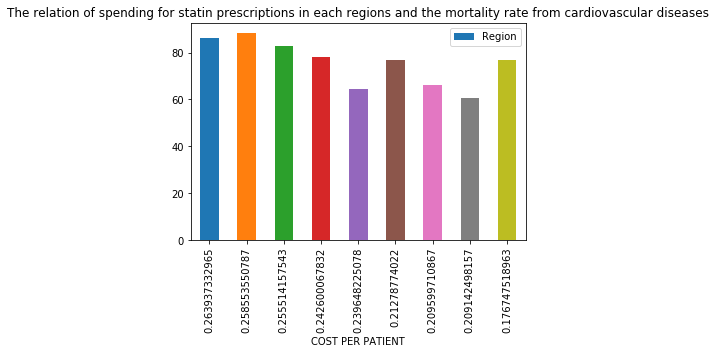

In [208]:
%matplotlib inline

ax0 = nine_reg_cost_per_pat_MR_after_adj.plot(kind = 'bar', x = 'COST PER PATIENT', y = 'Indicator value', 
                                    title = 'The relation of spending for statin prescriptions in each regions and the mortality rate from cardiovascular diseases',
                                   stacked=False)
ax0.legend(['Region'])

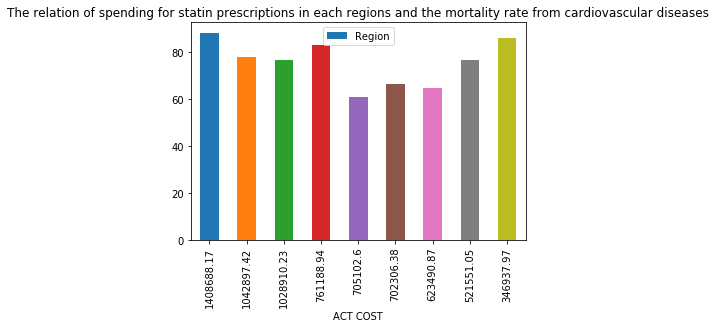

In [209]:
ax0 = nine_reg_cost_per_pat_MR_after_adj2.plot(kind = 'bar', x = 'ACT COST', y = 'Indicator value', 
                                    title = 'The relation of spending for statin prescriptions in each regions and the mortality rate from cardiovascular diseases',
                                   stacked=False)
ax0.legend(['Region'])

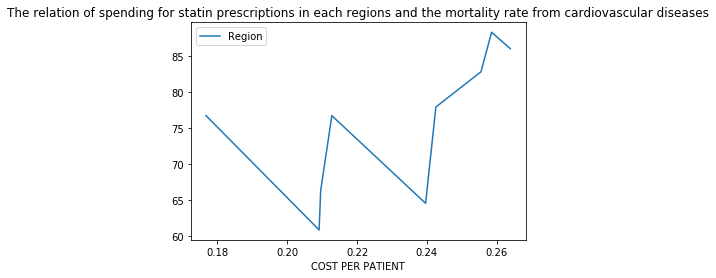

In [210]:
ax1 = nine_reg_cost_per_pat_MR_after_adj.plot(kind = 'line', x = 'COST PER PATIENT', y = 'Indicator value', 
                                    title = 'The relation of spending for statin prescriptions in each regions and the mortality rate from cardiovascular diseases',
                                   stacked=False)
ax1.legend(['Region'])

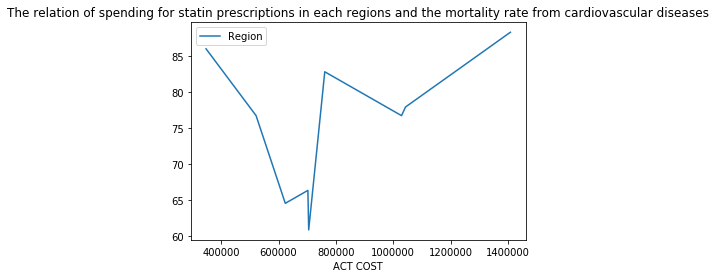

In [211]:
ax1 = nine_reg_cost_per_pat_MR_after_adj2.plot(kind = 'line', x = 'ACT COST', y = 'Indicator value', 
                                    title = 'The relation of spending for statin prescriptions in each regions and the mortality rate from cardiovascular diseases',
                                   stacked=False)
ax1.legend(['Region'])

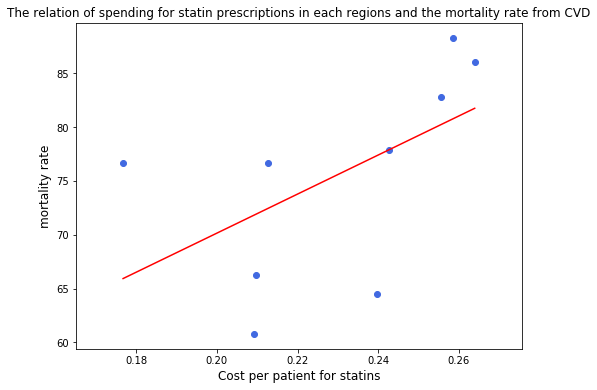

In [212]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111)
x = nine_reg_cost_per_pat_MR_after_adj['COST PER PATIENT']
y = nine_reg_cost_per_pat_MR_after_adj['Indicator value']
ax.scatter(x, y, color='royalblue')
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.set_title('The relation of spending for statin prescriptions in each regions and the mortality rate from CVD')
ax.set_xlabel("Cost per patient for statins",fontsize=12)
ax.set_ylabel("mortality rate",fontsize=12)


In [213]:
#According to the bar chart and the line chart, the pattern of positive relation is not that obvious.
#If we just see the result of those two chart, I do not think the relative spending for statin prescriptions 
#in each regions correlates with the mortality rate from cardiovascular diseases.
#However, after fit a trend line, we can see it seems there is a positive relation between cost per patient for statins and the mortality rate
#The cost per patient for statins is higher, the mortality rate is higher. 
#But the trend line may also easily be influenced since there is too less data point.

In [ ]:
#QUESTION 4
#1  Provide a visualisation of the seasonal patterns across all years.


In [214]:
url_au = 'https://www.google.org/flutrends/about/data/flu/au/data.txt'

#set header=8 to properly extract the data
australiaFluTrends = pd.read_csv(url_au, sep=',', header = 8)
australiaFluTrends['Date'] = pd.to_datetime(australiaFluTrends['Date'])

In [215]:
australiaFluTrends.head()

,Date,Australia,Australian Capital Territory,New South Wales,Queensland,South Australia,Victoria,Western Australia
0,2006-01-01,163,NaN,151,190,183,202,121
1,2006-01-08,174,104.0,170,189,162,169,214
2,2006-01-15,136,96.0,139,186,165,109,135
3,2006-01-22,121,143.0,119,142,107,129,99
4,2006-01-29,127,149.0,121,156,118,119,77


In [216]:
url_ca = 'https://www.google.org/flutrends/about/data/flu/ca/data.txt'

#set header=8 to properly extract the data
canadaFluTrends = pd.read_csv(url_ca, sep=',', header=8)
canadaFluTrends['Date'] = pd.to_datetime(canadaFluTrends['Date'])


In [217]:
canadaFluTrends.head()

,Date,Canada,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Saskatchewan,Quebec
0,2003-09-28,1280,NaN,1353,NaN,NaN,NaN,NaN,1349,NaN,960
1,2003-10-05,1339,2309.0,1161,1977.0,NaN,NaN,NaN,1323,NaN,1278
2,2003-10-12,1451,2615.0,1546,2313.0,NaN,NaN,NaN,1119,NaN,1344
3,2003-10-19,1593,2910.0,1813,1958.0,NaN,NaN,1805.0,1213,NaN,1377
4,2003-10-26,1895,4793.0,1883,1560.0,1600.0,NaN,1955.0,1492,3076.0,1138


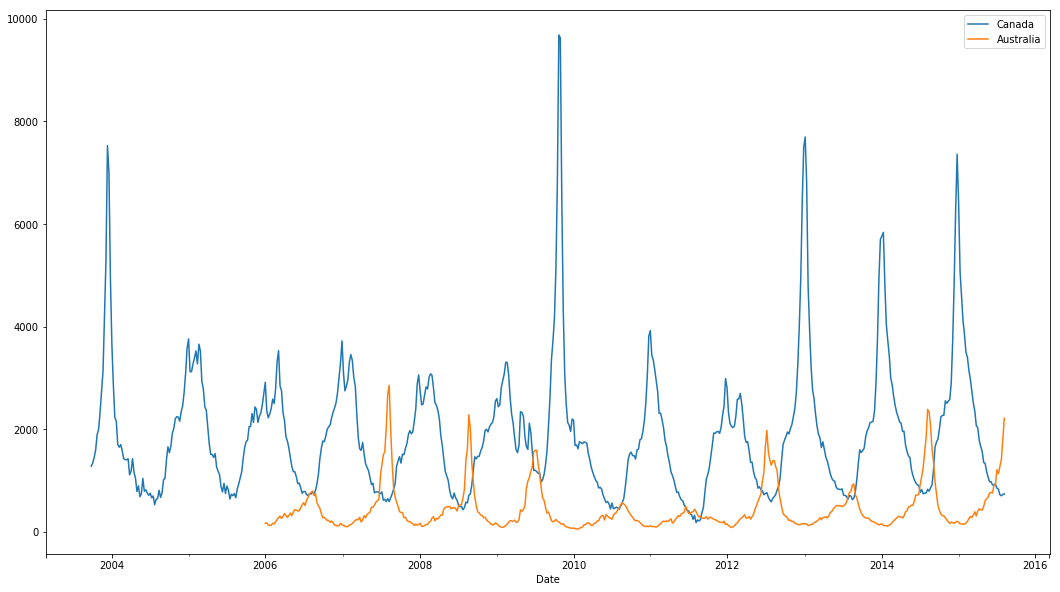

In [218]:
%matplotlib inline
#Plot and store the flu trens for Canada

ax = canadaFluTrends.plot(legend ='left', x='Date', y = 'Canada', figsize=(18, 10), grid=True)
#Plot the flu trend for Australia; ax=ax plots the chart into the previous

australiaFluTrends.plot(x='Date', y = 'Australia' , ax=ax)

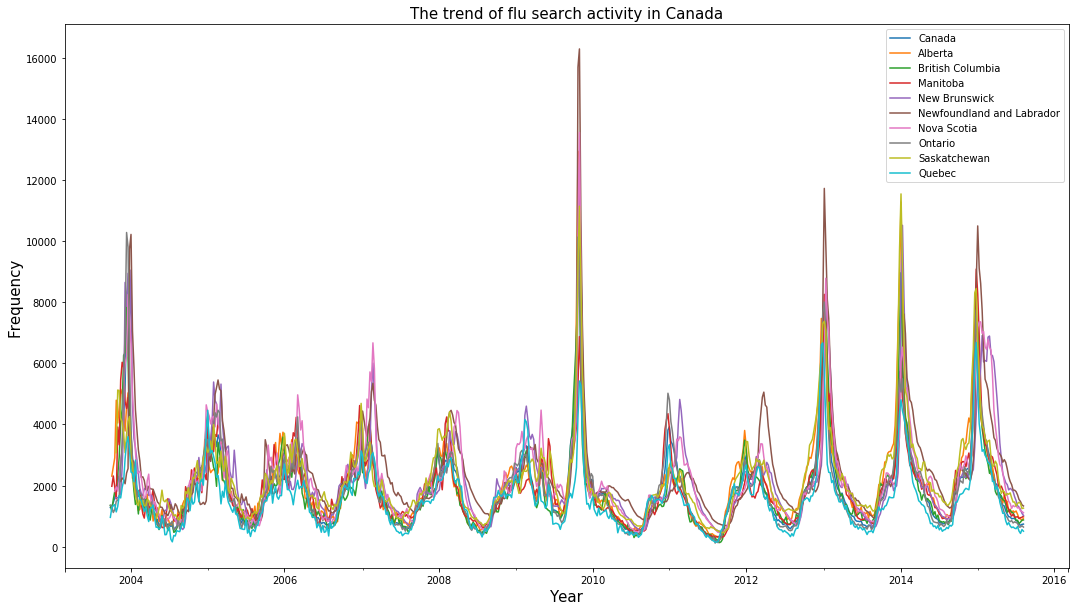

In [219]:
import matplotlib.pyplot as plt
%matplotlib inline
fig_ca = canadaFluTrends.plot(x='Date', figsize=(18,10))
fig_ca.set_title('The trend of flu search activity in Canada',fontsize=15)
fig_ca.set_ylabel('Frequency',fontsize=15)
fig_ca.set_xlabel('Year',fontsize=15)

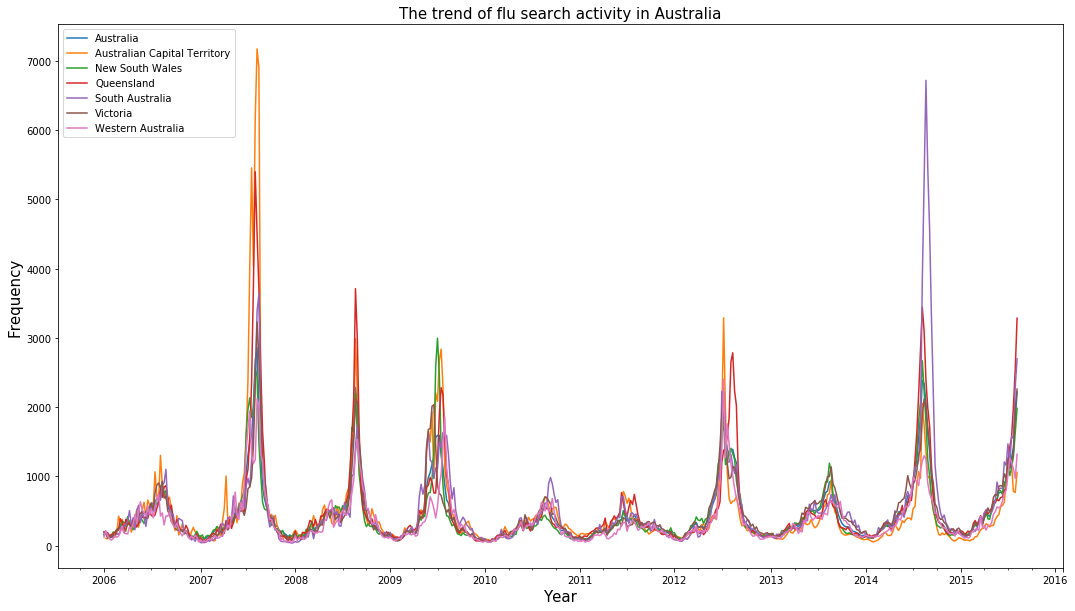

In [220]:
import matplotlib.pyplot as plt
%matplotlib inline
fig_au = australiaFluTrends.plot(x='Date', figsize=(18,10))
fig_au.set_title('The trend of flu search activity in Australia',fontsize=15)
fig_au.set_ylabel('Frequency',fontsize=15)
fig_au.set_xlabel('Year',fontsize=15)

In [ ]:
#Calculate the yearly minimum and maximum for each country. 
#Provide and plot a reasonable mathematical function that could be used as an approximation for the seasonal trend for each country.

In [221]:
australiaFluTrends['Year'] = australiaFluTrends['Date'].dt.year

In [222]:
aus_yearly_max = australiaFluTrends.groupby(['Year'],as_index=False)['Australia'].max()
aus_yearly_min = australiaFluTrends.groupby(['Year'],as_index=False)['Australia'].min()

In [223]:
#Australia yearly minimum and maximum 
Aus_yearly_min_and_max = pd.merge(aus_yearly_max, aus_yearly_min, on='Year', how='inner')
Aus_yearly_min_and_max.columns = ['Year','Maximum','Minimum']
Aus_yearly_min_and_max

,Year,Maximum,Minimum
0,2006,796,113
1,2007,2854,99
2,2008,2282,107
3,2009,1590,68
4,2010,563,53
5,2011,503,92
6,2012,1977,85
7,2013,932,122
8,2014,2387,113
9,2015,2216,147


In [224]:
canadaFluTrends['Year'] = canadaFluTrends['Date'].dt.year

In [225]:
can_yearly_max = canadaFluTrends.groupby(['Year'],as_index=False)['Canada'].max()
can_yearly_min = canadaFluTrends.groupby(['Year'],as_index=False)['Canada'].min()

In [226]:
#Canada yearly minimum and maximum 
Can_yearly_min_and_max = pd.merge(can_yearly_max, can_yearly_min, on='Year', how='inner')
Can_yearly_min_and_max.columns = ['Year','Maximum','Minimum']
Can_yearly_min_and_max

,Year,Maximum,Minimum
0,2003,7531,1280
1,2004,3649,528
2,2005,3761,639
3,2006,3722,707
4,2007,3456,588
5,2008,3080,429
6,2009,9688,973
7,2010,3816,442
8,2011,3924,180
9,2012,7496,583


In [ ]:
#Math function should follow the following format: y = x^4*b1 + x^3*b2 + x^2*b3 + x^1*b4 + b5
#I used the polyfit to get the coefficient of the function, and plot the function.

Coefficients: [ 1.35050719e-06 -1.08519477e-03  2.60847988e-01 -1.70924537e+01
  3.69377196e+02]


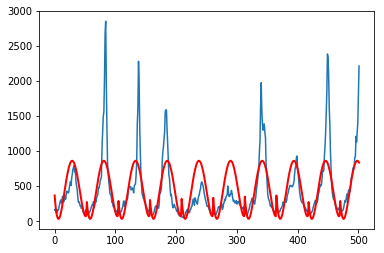

In [227]:
from matplotlib import pyplot
from numpy import polyfit

X = [7*i%365 for i in range(0, len(australiaFluTrends['Date']))]
y = australiaFluTrends['Australia'].astype(float)
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)

curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)

pyplot.plot(y)
pyplot.plot(curve, color='red', linewidth=2)
pyplot.show()

In [ ]:
#According to the above result, for Australia, the function is 
#Y = 1.35050719e-06 * X^4 - 1.08519477e-03 * x^3 + 2.60847988e-01 * X^2 - 1.70924537e+01 * X + 3.69377196e+02 

Coefficients: [-7.77259919e-09  6.05519076e-04 -3.46528181e-01  4.72029032e+01
  1.32002136e+03]


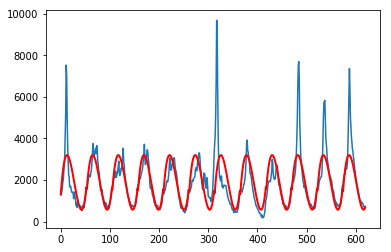

In [228]:
X = [7*i%365 for i in range(0, len(canadaFluTrends['Date']))]
y = canadaFluTrends['Canada'].astype(float)
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)

curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)

pyplot.plot(y)
pyplot.plot(curve, color='red', linewidth=2)
pyplot.show()

In [ ]:
#According to the above result, for Canada, the function is 
#Y = -7.77259919e-09 * X^4 + 6.05519076e-04 * x^3 - 3.46528181e-01 * X^2 + 4.72029032e+01 * X + 1.32002136e+03 

In [ ]:
#try of time series. Not the main part of the answer, just play with the function.

In [ ]:
#https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

In [229]:
list(australiaFluTrends)

['Date',
 'Australia',
 'Australian Capital Territory',
 'New South Wales',
 'Queensland',
 'South Australia',
 'Victoria',
 'Western Australia',
 'Year']

In [230]:
drop_aus = [
 'Australian Capital Territory',
 'New South Wales',
 'Queensland',
 'South Australia',
 'Victoria',
 'Western Australia',
 'Year']

In [231]:
australiaFluTrends_after_drop = australiaFluTrends.drop(drop_aus, axis=1)

In [232]:
australiaFluTrends_after_drop = australiaFluTrends_after_drop.set_index('Date')

In [233]:
import statsmodels.api as sm

D:\Jack\UCL\anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [234]:
aus=sm.tsa.seasonal_decompose(australiaFluTrends_after_drop.Australia)

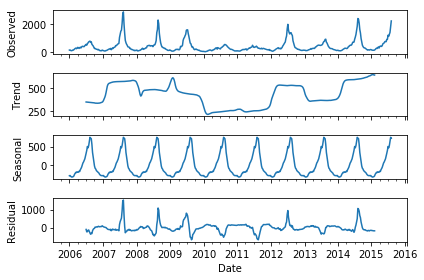

In [235]:
resplot = aus.plot()

In [236]:
list(canadaFluTrends)

['Date',
 'Canada',
 'Alberta',
 'British Columbia',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Nova Scotia',
 'Ontario',
 'Saskatchewan',
 'Quebec',
 'Year']

In [237]:
drop_can=[
 'Alberta',
 'British Columbia',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Nova Scotia',
 'Ontario',
 'Saskatchewan',
 'Quebec',
 'Year']

In [238]:
canadaFluTrends_after_drop = canadaFluTrends.drop(drop_can, axis=1)

In [239]:
canadaFluTrends_after_drop = canadaFluTrends_after_drop.set_index('Date')

In [240]:
can=sm.tsa.seasonal_decompose(canadaFluTrends_after_drop.Canada)

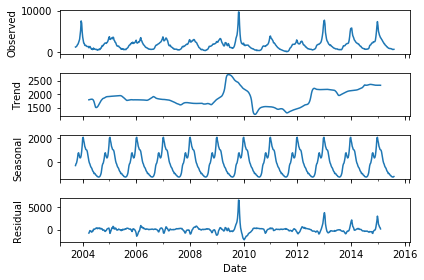

In [241]:
resplot = can.plot()

In [ ]:
#x(t) = s(t) + m(t) + e(t)
#Where t is the time coordinate
#x is the data
#s is the seasonal component
#e is the random error term
#m is the trend

In [410]:
aus.trend.head(2)

Date
2006-01-01   NaN
2006-01-08   NaN
Name: Australia, dtype: float64

In [409]:
aus.seasonal.head(2)

Date
2006-01-01   -286.65776
2006-01-08   -280.35541
Name: Australia, dtype: float64

In [408]:
aus.resid.head(2)

Date
2006-01-01   NaN
2006-01-08   NaN
Name: Australia, dtype: float64

In [ ]:
#Following part is just some notes, no the part of the answer of anything.

In [ ]:
#set season: spring = range(3, 5) summer = range(6, 8) fall = range(9, 11) winter = c(12, 1, 2)
#1 = winter, 2 = spring, 3 = summer, 4 = fall

australiaFluTrends['season'] = (australiaFluTrends['Date'].dt.month%12 + 3)//3
canadaFluTrends['season'] = (canadaFluTrends['Date'].dt.month%12 + 3)//3

In [394]:
def excel_date(date1):
    temp = datetime.datetime(1899, 12, 30)    
    delta = date1 - temp
    return float(delta.days) + (float(delta.seconds) / 86400)

In [401]:
aus_time = []
for i in range(0,len(australiaFluTrends['Date'])):
    aus_time.append(excel_date(australiaFluTrends['Date'][i]))


In [403]:
aus_time = np.array(aus_time)